In [3]:

ไ'''from google.colab import drive
drive.mount('/content/drive')'''

SyntaxError: invalid syntax (1738932480.py, line 1)

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
import datetime
import matplotlib as mpl
fp = mpl.font_manager.FontProperties(family='Tahoma',size=13)

%matplotlib inline

#Import Data

แปลง DOB และ System Car Code Date ให้เป็น วัน

In [5]:
#df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/IS/chaiyo-is2.csv", parse_dates=['DOB','System CAR Code Date'])
df = pd.read_excel('Data20230120.xlsx', parse_dates=['DOB','System CAR Code Date'])
df.head()

,Application Number,Principal Approve Amount,Principal Amount,Repayment Tenor Month Number,Gender,DOB,Occupation Description,Total Income Amount (Month),Collateral Type Code,Vehicle Brand,Vehicle Model,Vehicle Release Year,Vehicle Sub Model,Evaluation Amount,System CAR Code (Daily),System CAR Code Date,Final CAR Code Previous Month,Day Past Due (Aging),Application Status
0,25651226INSI00001,7500.0,0.00,12,M,1992-12-05,พนักงานบริษัท,10000.00,PU,TOYOTA,SPORT CRUISER,2002,EP,225500,S1,2022-12-26,S1,4,APPLICATION_COMPLETED
1,25650620ULMB00004,20000.0,13492.22,12,M,1986-08-15,อื่นๆ,25000.09,MC,HONDA,PCX 160,2018,BV,64500,S1,2022-06-20,S1,0,APPLICATION_COMPLETED
2,25650620ULCR00002,130000.0,125931.40,60,F,1996-04-30,อื่นๆ,15000.00,CAR,HONDA,CIVIC,2005,DK,220500,S1,2022-06-20,S1,0,APPLICATION_COMPLETED
3,25650621ULMB00001,70000.0,60867.83,36,M,1979-04-01,อื่นๆ,20000.00,MC,YAMAHA,N-MAX 155,2021,CE,81500,S1,2022-06-21,S1,0,APPLICATION_COMPLETED
4,25650621ULMB00011,3000.0,1585.66,13,M,1967-05-04,STREET VENDOR,30000.00,MC,HONDA,WAVE 125 I,2010,AY,20000,S1,2022-06-21,S1,0,APPLICATION_COMPLETED


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53496 entries, 0 to 53495
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Application Number             53496 non-null  object        
 1   Principal Approve Amount       53496 non-null  float64       
 2   Principal Amount               53496 non-null  float64       
 3   Repayment Tenor Month Number   53496 non-null  int64         
 4   Gender                         53496 non-null  object        
 5   DOB                            53496 non-null  datetime64[ns]
 6   Occupation Description         53496 non-null  object        
 7   Total Income Amount (Month)    53496 non-null  float64       
 8   Collateral Type Code           53496 non-null  object        
 9   Vehicle Brand                  53496 non-null  object        
 10  Vehicle Model                  53496 non-null  object        
 11  Vehicle Release

In [7]:
df.describe().round(2)

,Principal Approve Amount,Principal Amount,Repayment Tenor Month Number,Total Income Amount (Month),Vehicle Release Year,Evaluation Amount,Day Past Due (Aging)
count,53496.00,53496.00,53496.00,53496.00,53496.00,53496.00,53496.00
mean,101640.79,98746.29,39.39,25084.92,2012.50,164745.58,1.13
std,101697.95,101152.59,17.98,114036.90,5.52,159732.24,7.42
min,3000.00,-2253.34,1.00,0.00,1976.00,5000.00,0.00
25%,26000.00,24900.00,24.00,15000.00,2008.00,38900.00,0.00
50%,48000.00,40884.99,36.00,20000.00,2013.00,117000.00,0.00
75%,165000.00,160000.00,60.00,30000.00,2017.00,261125.00,0.00
max,2000000.00,2000000.00,120.00,20000000.00,2022.00,3282500.00,147.00


#Data Preparation

##แปลงชื่อ Columns และ แปลง DOB เป็น อายุ

In [8]:
df.rename(columns={'Day Past Due (Aging)':'DPD'}, inplace=True)
df['age'] = pd.to_datetime('today').year - df.DOB.dt.year

##คำนวณ % ของค่าว่าง

In [9]:
missing = df.isnull().sum()
missing

Application Number               0
Principal Approve Amount         0
Principal Amount                 0
Repayment Tenor Month Number     0
Gender                           0
DOB                              0
Occupation Description           0
Total Income Amount (Month)      0
Collateral Type Code             0
Vehicle Brand                    0
Vehicle Model                    0
Vehicle Release Year             0
Vehicle Sub Model                0
Evaluation Amount                0
System CAR Code (Daily)          0
System CAR Code Date             0
Final CAR Code Previous Month    0
DPD                              0
Application Status               0
age                              0
dtype: int64

In [10]:
missing_columns = list(missing[missing > 0].index)
missing_columns

[]

In [11]:
total_missing = missing[missing > 0]
total_missing

Series([], dtype: int64)

In [12]:
missing_df = pd.DataFrame(total_missing, columns=['number_of_missing_values'])
missing_df

,number_of_missing_values


In [13]:
missing_df['percent'] = total_missing * 100 / len(df)
missing_df

,number_of_missing_values,percent


In [14]:
#df.dropna(subset=['Collateral Type Code','Vehicle Brand','Vehicle Model','Vehicle Release Year','Vehicle Sub Model','Evaluation Amount'], inplace=True)

In [15]:
#df[ (df['Collateral Type Code'] != 'CAR')&(df['Collateral Type Code'] != 'PU')&(df['Collateral Type Code'] != 'MC')]

In [16]:
indexApp = df[(df['Collateral Type Code'] == 'OTH')].index
df.drop(indexApp , inplace=True)

In [17]:
df.shape

(53496, 20)

In [18]:
#เพิ่ม column อายุรถ
df['Vehicle Age'] = pd.to_datetime('today').year - df['Vehicle Release Year']
df

,Application Number,Principal Approve Amount,Principal Amount,Repayment Tenor Month Number,Gender,DOB,Occupation Description,Total Income Amount (Month),Collateral Type Code,Vehicle Brand,...,Vehicle Release Year,Vehicle Sub Model,Evaluation Amount,System CAR Code (Daily),System CAR Code Date,Final CAR Code Previous Month,DPD,Application Status,age,Vehicle Age
0,25651226INSI00001,7500.0,0.00,12,M,1992-12-05,พนักงานบริษัท,10000.00,PU,TOYOTA,...,2002,EP,225500,S1,2022-12-26,S1,4,APPLICATION_COMPLETED,31,21
1,25650620ULMB00004,20000.0,13492.22,12,M,1986-08-15,อื่นๆ,25000.09,MC,HONDA,...,2018,BV,64500,S1,2022-06-20,S1,0,APPLICATION_COMPLETED,37,5
2,25650620ULCR00002,130000.0,125931.40,60,F,1996-04-30,อื่นๆ,15000.00,CAR,HONDA,...,2005,DK,220500,S1,2022-06-20,S1,0,APPLICATION_COMPLETED,27,18
3,25650621ULMB00001,70000.0,60867.83,36,M,1979-04-01,อื่นๆ,20000.00,MC,YAMAHA,...,2021,CE,81500,S1,2022-06-21,S1,0,APPLICATION_COMPLETED,44,2
4,25650621ULMB00011,3000.0,1585.66,13,M,1967-05-04,STREET VENDOR,30000.00,MC,HONDA,...,2010,AY,20000,S1,2022-06-21,S1,0,APPLICATION_COMPLETED,56,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53491,25651231ULMB00013,40000.0,37993.41,24,M,1977-02-25,เกษตรกร,60000.00,MC,HONDA,...,2022,CP,53000,S1,2022-12-31,S1,0,APPLICATION_COMPLETED,46,1
53492,25651231REUC00010,140000.0,140000.00,60,M,1965-06-30,เกษตรกร,24500.00,PU,ISUZU,...,2006,CU,176000,S1,2022-12-31,S1,0,APPLICATION_COMPLETED,58,17
53493,25651231REUM00003,61800.0,61800.00,36,F,1983-11-21,STREET VENDOR,45000.00,MC,HONDA,...,2021,BQ,82500,S1,2022-12-31,S1,0,APPLICATION_COMPLETED,40,2
53494,25651230REUC00088,180000.0,180000.00,60,M,1974-07-28,พนักงานรัฐวิสาหกิจ,32000.00,PU,MAZDA,...,2012,AL,280000,S1,2022-12-31,S1,0,APPLICATION_COMPLETED,49,11


In [19]:
df[df['Application Number'].duplicated()]

,Application Number,Principal Approve Amount,Principal Amount,Repayment Tenor Month Number,Gender,DOB,Occupation Description,Total Income Amount (Month),Collateral Type Code,Vehicle Brand,...,Vehicle Release Year,Vehicle Sub Model,Evaluation Amount,System CAR Code (Daily),System CAR Code Date,Final CAR Code Previous Month,DPD,Application Status,age,Vehicle Age
178,25650627REUM00012,18000.0,4246.18,24,M,1997-09-07,STREET VENDOR,18000.0,MC,HONDA,...,2009,AI,24000,S1,2022-12-08,S3,0,APPLICATION_COMPLETED,26,14
188,25650627REUM00017,50000.0,8475.68,36,M,1995-11-09,อื่นๆ,1500.0,MC,HONDA,...,2019,CF,72000,S1,2022-12-28,S3,0,APPLICATION_COMPLETED,28,4
295,25650629ULCR00015,60000.0,59928.81,36,M,1986-11-15,อื่นๆ,80000.0,CAR,ISUZU,...,2000,FR,358000,S2,2023-01-03,S1,28,APPLICATION_COMPLETED,37,23
369,25650629ULMB00149,34000.0,-2253.34,12,F,2001-08-11,อื่นๆ,20000.0,MC,HONDA,...,2021,BX,45500,S1,2022-09-21,S2,0,APPLICATION_COMPLETED,22,2
446,25650629ULMB00319,5000.0,2586.19,12,F,1992-07-08,พนักงานบริษัท,12000.0,MC,HONDA,...,2021,BZ,43500,S1,2022-06-29,S1,0,APPLICATION_COMPLETED,31,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21708,25651004ULMB00196,26000.0,26000.00,36,M,1974-06-05,อื่นๆ,15000.0,MC,HONDA,...,2013,CC,35500,S2,2023-01-03,S1,28,APPLICATION_COMPLETED,49,10
22663,25651006REUC00190,250000.0,250000.00,60,F,1979-03-04,อื่นๆ,40000.0,PU,TOYOTA,...,2005,AY,331000,S1,2022-10-07,S1,0,APPLICATION_COMPLETED,44,18
24290,25651011ULCR00132,143000.0,143000.00,60,M,1976-10-10,พนักงานบริษัท,13000.0,PU,NISSAN,...,2007,BR,204000,S1,2022-10-12,S1,0,APPLICATION_COMPLETED,47,16
26203,25651019ULMB00004,34000.0,34000.00,36,M,1983-08-12,อื่นๆ,20000.0,MC,YAMAHA,...,2020,CN,56500,S1,2022-10-19,S1,7,APPLICATION_COMPLETED,40,3


In [20]:
df.drop_duplicates(['Application Number'], inplace=True)

df.reset_index(drop=True, inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53423 entries, 0 to 53422
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Application Number             53423 non-null  object        
 1   Principal Approve Amount       53423 non-null  float64       
 2   Principal Amount               53423 non-null  float64       
 3   Repayment Tenor Month Number   53423 non-null  int64         
 4   Gender                         53423 non-null  object        
 5   DOB                            53423 non-null  datetime64[ns]
 6   Occupation Description         53423 non-null  object        
 7   Total Income Amount (Month)    53423 non-null  float64       
 8   Collateral Type Code           53423 non-null  object        
 9   Vehicle Brand                  53423 non-null  object        
 10  Vehicle Model                  53423 non-null  object        
 11  Vehicle Release

In [22]:
df.isna().sum()

Application Number               0
Principal Approve Amount         0
Principal Amount                 0
Repayment Tenor Month Number     0
Gender                           0
DOB                              0
Occupation Description           0
Total Income Amount (Month)      0
Collateral Type Code             0
Vehicle Brand                    0
Vehicle Model                    0
Vehicle Release Year             0
Vehicle Sub Model                0
Evaluation Amount                0
System CAR Code (Daily)          0
System CAR Code Date             0
Final CAR Code Previous Month    0
DPD                              0
Application Status               0
age                              0
Vehicle Age                      0
dtype: int64

In [23]:
df['Repayment Tenor Month Number']=df['Repayment Tenor Month Number'].astype(int)
df['Vehicle Release Year']=df['Vehicle Release Year'].astype(int)
df['DPD']=df['DPD'].astype(np.int64)
df['Vehicle Release Year']=df['Vehicle Release Year'].astype(np.int64)
df['Vehicle Age']=df['Vehicle Age'].astype(np.int64)

In [24]:
print(df.shape)
df.tail()

(53423, 21)


,Application Number,Principal Approve Amount,Principal Amount,Repayment Tenor Month Number,Gender,DOB,Occupation Description,Total Income Amount (Month),Collateral Type Code,Vehicle Brand,...,Vehicle Release Year,Vehicle Sub Model,Evaluation Amount,System CAR Code (Daily),System CAR Code Date,Final CAR Code Previous Month,DPD,Application Status,age,Vehicle Age
53418,25651231ULMB00013,40000.0,37993.41,24,M,1977-02-25,เกษตรกร,60000.0,MC,HONDA,...,2022,CP,53000,S1,2022-12-31,S1,0,APPLICATION_COMPLETED,46,1
53419,25651231REUC00010,140000.0,140000.00,60,M,1965-06-30,เกษตรกร,24500.0,PU,ISUZU,...,2006,CU,176000,S1,2022-12-31,S1,0,APPLICATION_COMPLETED,58,17
53420,25651231REUM00003,61800.0,61800.00,36,F,1983-11-21,STREET VENDOR,45000.0,MC,HONDA,...,2021,BQ,82500,S1,2022-12-31,S1,0,APPLICATION_COMPLETED,40,2
53421,25651230REUC00088,180000.0,180000.00,60,M,1974-07-28,พนักงานรัฐวิสาหกิจ,32000.0,PU,MAZDA,...,2012,AL,280000,S1,2022-12-31,S1,0,APPLICATION_COMPLETED,49,11
53422,25651231REUC00011,123000.0,123000.00,60,M,1990-10-15,อื่นๆ,60000.0,CAR,HONDA,...,2005,BJ,164000,S1,2022-12-31,S1,0,APPLICATION_COMPLETED,33,18


##หาค่าที่เป็น NPL

In [25]:
df.head()

,Application Number,Principal Approve Amount,Principal Amount,Repayment Tenor Month Number,Gender,DOB,Occupation Description,Total Income Amount (Month),Collateral Type Code,Vehicle Brand,...,Vehicle Release Year,Vehicle Sub Model,Evaluation Amount,System CAR Code (Daily),System CAR Code Date,Final CAR Code Previous Month,DPD,Application Status,age,Vehicle Age
0,25651226INSI00001,7500.0,0.00,12,M,1992-12-05,พนักงานบริษัท,10000.00,PU,TOYOTA,...,2002,EP,225500,S1,2022-12-26,S1,4,APPLICATION_COMPLETED,31,21
1,25650620ULMB00004,20000.0,13492.22,12,M,1986-08-15,อื่นๆ,25000.09,MC,HONDA,...,2018,BV,64500,S1,2022-06-20,S1,0,APPLICATION_COMPLETED,37,5
2,25650620ULCR00002,130000.0,125931.40,60,F,1996-04-30,อื่นๆ,15000.00,CAR,HONDA,...,2005,DK,220500,S1,2022-06-20,S1,0,APPLICATION_COMPLETED,27,18
3,25650621ULMB00001,70000.0,60867.83,36,M,1979-04-01,อื่นๆ,20000.00,MC,YAMAHA,...,2021,CE,81500,S1,2022-06-21,S1,0,APPLICATION_COMPLETED,44,2
4,25650621ULMB00011,3000.0,1585.66,13,M,1967-05-04,STREET VENDOR,30000.00,MC,HONDA,...,2010,AY,20000,S1,2022-06-21,S1,0,APPLICATION_COMPLETED,56,13


In [26]:
df['Collateral Type Code'].value_counts()

MC       25938
PU       14475
CAR      12311
VAN        388
TRUCK      311
Name: Collateral Type Code, dtype: int64

In [27]:
df0 = df[df['DPD']==0]
df0.shape

(51355, 21)

In [28]:
indexApp = df[ (df['DPD'] == 0)].index
df.drop(indexApp , inplace=True)

In [29]:
df1_30 = df[(df['DPD'] >= 1) & (df['DPD'] <= 30)]
df1_30.shape

(1469, 21)

In [30]:
df31_60 = df[(df['DPD'] >= 30) & (df['DPD'] <= 60)]
df31_60.shape

(442, 21)

In [31]:
df61_90 = df[(df['DPD'] >= 60) & (df['DPD'] <= 90)]
df61_90.shape

(100, 21)

In [32]:
df90up = df[df['DPD']>=90]
df90up.shape

(57, 21)

In [33]:
print("DPD 0",df0.shape)
print("df1_30",df1_30.shape)
print("df31_60",df31_60.shape)
print("df61_90",df61_90.shape)
print("df90up",df90up.shape)

DPD 0 (51355, 21)
df1_30 (1469, 21)
df31_60 (442, 21)
df61_90 (100, 21)
df90up (57, 21)


In [34]:
df['DPD'].value_counts()

25     368
2      267
55     177
22     165
7      136
28     133
13     112
4      104
17      70
58      64
19      62
10      52
52      52
47      42
32      29
43      22
89      22
37      20
40      19
63      15
93      15
83      13
78      13
49      11
116     10
74      10
86       9
108      7
34       6
65       6
68       5
98       5
104      4
71       4
113      4
95       4
80       3
110      3
119      2
132      1
124      1
147      1
Name: DPD, dtype: int64

In [35]:
df['Collateral Type Code'].value_counts()

MC       1246
PU        434
CAR       370
VAN        12
TRUCK       6
Name: Collateral Type Code, dtype: int64

#อาจจะต้องแบ่งแบบตัว 0 วันมารวมใน PL ด้วย
0 วัน
1-30 วัน
31-60

In [36]:
from pandas.api.types import CategoricalDtype
#bins = [0,30,60]
pl_npl = ['PL','NPL']
df['DPD'] = pd.cut(df.DPD,
                                    bins = [1,30,90],
                                    labels=pl_npl, 
                                    right=True).astype(CategoricalDtype(pl_npl, ordered=True))
df.sort_values(by='DPD')

,Application Number,Principal Approve Amount,Principal Amount,Repayment Tenor Month Number,Gender,DOB,Occupation Description,Total Income Amount (Month),Collateral Type Code,Vehicle Brand,...,Vehicle Release Year,Vehicle Sub Model,Evaluation Amount,System CAR Code (Daily),System CAR Code Date,Final CAR Code Previous Month,DPD,Application Status,age,Vehicle Age
0,25651226INSI00001,7500.0,0.00,12,M,1992-12-05,พนักงานบริษัท,10000.0,PU,TOYOTA,...,2002,EP,225500,S1,2022-12-26,S1,PL,APPLICATION_COMPLETED,31,21
16766,25650919REUC00052,249000.0,249000.00,60,M,1995-06-30,พนักงานบริษัท,20000.0,PU,MITSUBISHI,...,2015,BJ,354000,S1,2022-09-19,S1,PL,APPLICATION_COMPLETED,28,8
16757,25650919REUM00030,28000.0,27902.58,36,F,1988-03-23,STREET VENDOR,40000.0,MC,HONDA,...,2018,BP,37500,S1,2022-09-19,S1,PL,APPLICATION_COMPLETED,35,5
16717,25650919REUM00020,18000.0,17569.10,36,F,1982-06-17,พนักงานบริษัท,10000.0,MC,YAMAHA,...,2012,AE,25000,S1,2022-09-19,S1,PL,APPLICATION_COMPLETED,41,11
16708,25650919ULCR00045,220000.0,219526.10,54,F,1988-03-13,บุคลากรทางการแพทย์,32000.0,CAR,TOYOTA,...,2014,BA,295500,S2,2023-01-06,S1,PL,APPLICATION_COMPLETED,35,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4689,25650730ULCR00055,230000.0,230000.00,60,F,1989-06-29,STREET VENDOR,50000.0,CAR,TOYOTA,...,2011,AO,308000,S3,2022-12-29,S2,NaN,APPLICATION_COMPLETED,34,12
5826,25650804ULCR00031,144000.0,144000.00,60,M,1969-12-11,ข้าราชการ,36000.0,CAR,TOYOTA,...,2010,DX,222000,S3,2022-12-29,S2,NaN,APPLICATION_COMPLETED,54,13
8543,25650817ULMB00101,35000.0,33839.69,24,F,1988-02-18,STREET VENDOR,70000.0,MC,YAMAHA,...,2017,CQ,46500,S2,2023-01-13,S3,NaN,APPLICATION_COMPLETED,35,6
9020,25650819ULMB00039,39000.0,39000.00,36,F,1988-01-09,พนักงานบริษัท,15000.0,MC,HONDA,...,2017,CO,53000,S3,2022-12-29,S2,NaN,APPLICATION_COMPLETED,35,6


In [37]:
df[(df['DPD'] == 'PL')]

,Application Number,Principal Approve Amount,Principal Amount,Repayment Tenor Month Number,Gender,DOB,Occupation Description,Total Income Amount (Month),Collateral Type Code,Vehicle Brand,...,Vehicle Release Year,Vehicle Sub Model,Evaluation Amount,System CAR Code (Daily),System CAR Code Date,Final CAR Code Previous Month,DPD,Application Status,age,Vehicle Age
0,25651226INSI00001,7500.00,0.00,12,M,1992-12-05,พนักงานบริษัท,10000.0,PU,TOYOTA,...,2002,EP,225500,S1,2022-12-26,S1,PL,APPLICATION_COMPLETED,31,21
10,25650621ULCR00004,30000.00,26618.83,24,M,1994-12-24,อื่นๆ,40000.0,CAR,CHEVROLET,...,2012,BT,121000,S1,2022-06-21,S1,PL,APPLICATION_COMPLETED,29,11
65,25650623ULCR00008,220000.00,0.00,60,M,1972-05-05,พนักงานบริษัท,25000.0,PU,TOYOTA,...,2006,CY,296000,S1,2023-01-11,S2,PL,APPLICATION_COMPLETED,51,17
72,25650623ULMB00025,30000.00,29959.48,24,F,1979-05-30,อื่นๆ,20000.0,MC,YAMAHA,...,2019,AY,46500,S2,2023-01-14,S1,PL,APPLICATION_COMPLETED,44,4
94,25650624ULCR00024,90000.00,89933.60,24,M,1966-09-20,พนักงานบริษัท,15000.0,PU,MITSUBISHI,...,2012,AO,157000,S2,2023-01-09,S1,PL,APPLICATION_COMPLETED,57,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43069,25651128TRUM00004,31632.28,31632.28,48,F,1973-06-24,อื่นๆ,10000.0,MC,HONDA,...,2019,DS,43000,S2,2022-11-28,S2,PL,APPLICATION_COMPLETED,50,4
43073,25651130TDUM00035,22853.47,22853.47,36,F,1989-07-18,พนักงานบริษัท,10000.0,MC,GPX,...,2019,AC,33500,S2,2022-11-30,S2,PL,APPLICATION_COMPLETED,34,4
43583,25651130TDUC00041,190000.00,186373.32,84,M,1985-01-15,พนักงานบริษัท,60000.0,CAR,HONDA,...,2008,AN,252500,S2,2022-11-30,S2,PL,APPLICATION_COMPLETED,38,15
47433,25651124TDUC00006,97000.00,97000.00,36,F,1982-11-30,STREET VENDOR,70000.0,PU,NISSAN,...,2005,BB,161500,S2,2022-11-24,S2,PL,APPLICATION_COMPLETED,41,18


In [38]:
df[(df['DPD'] == 'NPL')]

,Application Number,Principal Approve Amount,Principal Amount,Repayment Tenor Month Number,Gender,DOB,Occupation Description,Total Income Amount (Month),Collateral Type Code,Vehicle Brand,...,Vehicle Release Year,Vehicle Sub Model,Evaluation Amount,System CAR Code (Daily),System CAR Code Date,Final CAR Code Previous Month,DPD,Application Status,age,Vehicle Age
22,25650621ULMB00060,20000.0,18434.00,12,M,1994-01-26,อื่นๆ,15000.0,MC,HONDA,...,2019,DB,34500,S2,2023-01-10,S3,NPL,APPLICATION_COMPLETED,29,4
59,25650623REUC00004,165000.0,0.00,60,M,1990-10-19,STREET VENDOR,30000.0,CAR,TOYOTA,...,2010,DZ,240000,S1,2023-01-10,S2,NPL,APPLICATION_COMPLETED,33,13
61,25650623ULMB00007,28000.0,26483.19,24,F,1989-12-30,อื่นๆ,15000.0,MC,HONDA,...,2015,CC,44000,S2,2022-11-27,S1,NPL,APPLICATION_COMPLETED,34,8
69,25650623ULMB00021,14000.0,13975.46,36,F,1982-10-22,พนักงานบริษัท,13000.0,MC,HONDA,...,2009,AF,19000,S2,2022-12-07,S1,NPL,APPLICATION_COMPLETED,41,14
111,25650625REUC00004,130000.0,130000.00,60,F,1986-12-09,STREET VENDOR,35000.0,PU,FORD,...,2007,BU,212000,S2,2022-12-07,S1,NPL,APPLICATION_COMPLETED,37,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27564,25651022REUM00023,16000.0,16000.00,36,F,1957-11-26,เกษตรกร,13000.0,MC,HONDA,...,2011,AZ,22000,S2,2022-12-22,S1,NPL,APPLICATION_COMPLETED,66,12
27854,25651024ULMB00245,14000.0,14000.00,12,F,1982-03-22,อื่นๆ,8000.0,MC,HONDA,...,2010,AG,20000,S2,2022-12-25,S1,NPL,APPLICATION_COMPLETED,41,13
27996,25651025ULMB00010,34000.0,34000.00,36,M,1990-01-09,STREET VENDOR,15000.0,MC,HONDA,...,2022,CP,53000,S2,2022-12-30,S1,NPL,APPLICATION_COMPLETED,33,1
28168,25651025REUM00059,40000.0,40000.00,24,F,1976-08-22,STREET VENDOR,25000.0,MC,HONDA,...,2022,CP,57100,S2,2022-12-25,S1,NPL,APPLICATION_COMPLETED,47,1


In [39]:
df.DPD.unique()

['PL', 'NPL', NaN]
Categories (2, object): ['PL' < 'NPL']

In [40]:
'''bins = [0,30,60]
pl_npl = ['PL','NPL']

dpd_cate = pd.cut(df.DPD, bins, labels=pl_npl)
dpd_cate'''

"bins = [0,30,60]\npl_npl = ['PL','NPL']\n\ndpd_cate = pd.cut(df.DPD, bins, labels=pl_npl)\ndpd_cate"

In [41]:
df['DPD'].value_counts()

PL     1469
NPL     542
Name: DPD, dtype: int64

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2068 entries, 0 to 50786
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Application Number             2068 non-null   object        
 1   Principal Approve Amount       2068 non-null   float64       
 2   Principal Amount               2068 non-null   float64       
 3   Repayment Tenor Month Number   2068 non-null   int32         
 4   Gender                         2068 non-null   object        
 5   DOB                            2068 non-null   datetime64[ns]
 6   Occupation Description         2068 non-null   object        
 7   Total Income Amount (Month)    2068 non-null   float64       
 8   Collateral Type Code           2068 non-null   object        
 9   Vehicle Brand                  2068 non-null   object        
 10  Vehicle Model                  2068 non-null   object        
 11  Vehicle Release 

In [43]:
df[(df['System CAR Code (Daily)']=='S1')]

,Application Number,Principal Approve Amount,Principal Amount,Repayment Tenor Month Number,Gender,DOB,Occupation Description,Total Income Amount (Month),Collateral Type Code,Vehicle Brand,...,Vehicle Release Year,Vehicle Sub Model,Evaluation Amount,System CAR Code (Daily),System CAR Code Date,Final CAR Code Previous Month,DPD,Application Status,age,Vehicle Age
0,25651226INSI00001,7500.0,0.00,12,M,1992-12-05,พนักงานบริษัท,10000.0,PU,TOYOTA,...,2002,EP,225500,S1,2022-12-26,S1,PL,APPLICATION_COMPLETED,31,21
10,25650621ULCR00004,30000.0,26618.83,24,M,1994-12-24,อื่นๆ,40000.0,CAR,CHEVROLET,...,2012,BT,121000,S1,2022-06-21,S1,PL,APPLICATION_COMPLETED,29,11
59,25650623REUC00004,165000.0,0.00,60,M,1990-10-19,STREET VENDOR,30000.0,CAR,TOYOTA,...,2010,DZ,240000,S1,2023-01-10,S2,NPL,APPLICATION_COMPLETED,33,13
65,25650623ULCR00008,220000.0,0.00,60,M,1972-05-05,พนักงานบริษัท,25000.0,PU,TOYOTA,...,2006,CY,296000,S1,2023-01-11,S2,PL,APPLICATION_COMPLETED,51,17
148,25650627ULMB00032,17000.0,16920.59,36,M,1988-01-02,อื่นๆ,20000.0,MC,KAWASAKI,...,2014,AL,24500,S1,2022-06-27,S1,PL,APPLICATION_COMPLETED,35,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39673,25651126ULMB00072,25000.0,24319.58,36,M,1983-02-08,พนักงานบริษัท,10000.0,MC,HONDA,...,2015,CM,38000,S1,2022-11-27,S1,PL,APPLICATION_COMPLETED,40,8
39923,25651128ULMB00077,24000.0,24000.00,30,F,1994-07-30,STREET VENDOR,30000.0,MC,HONDA,...,2016,CP,32000,S1,2022-11-28,S1,PL,APPLICATION_COMPLETED,29,7
39991,25651128ULMB00120,24000.0,23969.51,18,F,1992-11-19,พนักงานบริษัท,15000.0,MC,YAMAHA,...,2015,BF,33000,S1,2022-11-28,S1,PL,APPLICATION_COMPLETED,31,8
40692,25651129REUM00109,12800.0,12448.22,36,F,1988-11-30,พนักงานบริษัท,18000.0,MC,HONDA,...,2010,AE,17000,S1,2022-11-29,S1,PL,APPLICATION_COMPLETED,35,13


In [44]:
df[(df['System CAR Code (Daily)']=='S2')]

,Application Number,Principal Approve Amount,Principal Amount,Repayment Tenor Month Number,Gender,DOB,Occupation Description,Total Income Amount (Month),Collateral Type Code,Vehicle Brand,...,Vehicle Release Year,Vehicle Sub Model,Evaluation Amount,System CAR Code (Daily),System CAR Code Date,Final CAR Code Previous Month,DPD,Application Status,age,Vehicle Age
22,25650621ULMB00060,20000.00,18434.00,12,M,1994-01-26,อื่นๆ,15000.0,MC,HONDA,...,2019,DB,34500,S2,2023-01-10,S3,NPL,APPLICATION_COMPLETED,29,4
61,25650623ULMB00007,28000.00,26483.19,24,F,1989-12-30,อื่นๆ,15000.0,MC,HONDA,...,2015,CC,44000,S2,2022-11-27,S1,NPL,APPLICATION_COMPLETED,34,8
69,25650623ULMB00021,14000.00,13975.46,36,F,1982-10-22,พนักงานบริษัท,13000.0,MC,HONDA,...,2009,AF,19000,S2,2022-12-07,S1,NPL,APPLICATION_COMPLETED,41,14
72,25650623ULMB00025,30000.00,29959.48,24,F,1979-05-30,อื่นๆ,20000.0,MC,YAMAHA,...,2019,AY,46500,S2,2023-01-14,S1,PL,APPLICATION_COMPLETED,44,4
94,25650624ULCR00024,90000.00,89933.60,24,M,1966-09-20,พนักงานบริษัท,15000.0,PU,MITSUBISHI,...,2012,AO,157000,S2,2023-01-09,S1,PL,APPLICATION_COMPLETED,57,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42439,25651205TRUC00002,189000.00,189000.00,72,F,1977-09-05,พนักงานบริษัท,20620.0,CAR,TOYOTA,...,2013,DV,253500,S2,2022-12-06,S2,PL,APPLICATION_COMPLETED,46,10
43069,25651128TRUM00004,31632.28,31632.28,48,F,1973-06-24,อื่นๆ,10000.0,MC,HONDA,...,2019,DS,43000,S2,2022-11-28,S2,PL,APPLICATION_COMPLETED,50,4
43073,25651130TDUM00035,22853.47,22853.47,36,F,1989-07-18,พนักงานบริษัท,10000.0,MC,GPX,...,2019,AC,33500,S2,2022-11-30,S2,PL,APPLICATION_COMPLETED,34,4
43583,25651130TDUC00041,190000.00,186373.32,84,M,1985-01-15,พนักงานบริษัท,60000.0,CAR,HONDA,...,2008,AN,252500,S2,2022-11-30,S2,PL,APPLICATION_COMPLETED,38,15


In [45]:
df[(df['System CAR Code (Daily)']=='S3')]

,Application Number,Principal Approve Amount,Principal Amount,Repayment Tenor Month Number,Gender,DOB,Occupation Description,Total Income Amount (Month),Collateral Type Code,Vehicle Brand,...,Vehicle Release Year,Vehicle Sub Model,Evaluation Amount,System CAR Code (Daily),System CAR Code Date,Final CAR Code Previous Month,DPD,Application Status,age,Vehicle Age
64,25650623REUM00003,51000.0,50715.88,36,F,1995-04-10,อื่นๆ,10000.0,MC,HONDA,...,2018,BV,64500,S3,2022-12-29,S2,NaN,APPLICATION_COMPLETED,28,5
131,25650627ULMB00018,37000.0,36011.72,36,M,1997-02-03,พนักงานบริษัท,20500.0,MC,HONDA,...,2022,CP,57100,S3,2022-12-29,S2,NaN,APPLICATION_COMPLETED,26,1
426,25650629ULMB00287,35000.0,35000.00,36,F,1981-06-13,STREET VENDOR,15000.0,MC,HONDA,...,2020,CX,46500,S3,2022-12-06,S2,NaN,APPLICATION_COMPLETED,42,3
503,25650630ULCR00044,190000.0,190000.00,60,M,1988-08-03,อื่นๆ,30000.0,CAR,TOYOTA,...,2009,EO,323500,S3,2022-11-28,S2,NaN,APPLICATION_COMPLETED,35,14
505,25650630REUM00024,15000.0,15000.00,18,F,1984-10-30,STREET VENDOR,15000.0,MC,HONDA,...,2012,BO,23000,S3,2022-12-09,S2,NaN,APPLICATION_COMPLETED,39,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8266,25650816REUC00035,350000.0,350000.00,60,F,1966-04-05,STREET VENDOR,20000.0,PU,ISUZU,...,2016,CC,438500,S3,2023-01-13,S2,NPL,APPLICATION_COMPLETED,57,7
8898,25650818REUC00106,218000.0,218000.00,48,M,1987-12-14,ข้าราชการ,24050.0,CAR,TOYOTA,...,2013,DU,290000,S3,2023-01-13,S2,NPL,APPLICATION_COMPLETED,36,10
9020,25650819ULMB00039,39000.0,39000.00,36,F,1988-01-09,พนักงานบริษัท,15000.0,MC,HONDA,...,2017,CO,53000,S3,2022-12-29,S2,NaN,APPLICATION_COMPLETED,35,6
9753,25650822ULCR00153,300000.0,300000.00,60,F,1971-11-04,เกษตรกร,20000.0,PU,NISSAN,...,2019,DQ,484500,S3,2022-12-29,S2,NaN,APPLICATION_COMPLETED,52,4


##Data Selection

###นำข้อมูลผู้ประกอบการออกเนื่องจาก รายได้ที่กรอกมามี 100000 - 700000 จึงทำให้เกิด outliner:

In [46]:
df['Occupation Description'].unique()

array(['พนักงานบริษัท', 'อื่นๆ', 'STREET VENDOR', 'พนักงานรัฐวิสาหกิจ',
       'เกษตรกร', 'ข้าราชการ', 'อาจารย์', 'เลี้ยงสัตว์',
       'บุคลากรทางการแพทย์'], dtype=object)

In [47]:
indexApp = df[(df['Vehicle Age']>=30)].index
df.drop(indexApp , inplace=True)
df

,Application Number,Principal Approve Amount,Principal Amount,Repayment Tenor Month Number,Gender,DOB,Occupation Description,Total Income Amount (Month),Collateral Type Code,Vehicle Brand,...,Vehicle Release Year,Vehicle Sub Model,Evaluation Amount,System CAR Code (Daily),System CAR Code Date,Final CAR Code Previous Month,DPD,Application Status,age,Vehicle Age
0,25651226INSI00001,7500.00,0.00,12,M,1992-12-05,พนักงานบริษัท,10000.0,PU,TOYOTA,...,2002,EP,225500,S1,2022-12-26,S1,PL,APPLICATION_COMPLETED,31,21
10,25650621ULCR00004,30000.00,26618.83,24,M,1994-12-24,อื่นๆ,40000.0,CAR,CHEVROLET,...,2012,BT,121000,S1,2022-06-21,S1,PL,APPLICATION_COMPLETED,29,11
22,25650621ULMB00060,20000.00,18434.00,12,M,1994-01-26,อื่นๆ,15000.0,MC,HONDA,...,2019,DB,34500,S2,2023-01-10,S3,NPL,APPLICATION_COMPLETED,29,4
59,25650623REUC00004,165000.00,0.00,60,M,1990-10-19,STREET VENDOR,30000.0,CAR,TOYOTA,...,2010,DZ,240000,S1,2023-01-10,S2,NPL,APPLICATION_COMPLETED,33,13
61,25650623ULMB00007,28000.00,26483.19,24,F,1989-12-30,อื่นๆ,15000.0,MC,HONDA,...,2015,CC,44000,S2,2022-11-27,S1,NPL,APPLICATION_COMPLETED,34,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43069,25651128TRUM00004,31632.28,31632.28,48,F,1973-06-24,อื่นๆ,10000.0,MC,HONDA,...,2019,DS,43000,S2,2022-11-28,S2,PL,APPLICATION_COMPLETED,50,4
43073,25651130TDUM00035,22853.47,22853.47,36,F,1989-07-18,พนักงานบริษัท,10000.0,MC,GPX,...,2019,AC,33500,S2,2022-11-30,S2,PL,APPLICATION_COMPLETED,34,4
43583,25651130TDUC00041,190000.00,186373.32,84,M,1985-01-15,พนักงานบริษัท,60000.0,CAR,HONDA,...,2008,AN,252500,S2,2022-11-30,S2,PL,APPLICATION_COMPLETED,38,15
47433,25651124TDUC00006,97000.00,97000.00,36,F,1982-11-30,STREET VENDOR,70000.0,PU,NISSAN,...,2005,BB,161500,S2,2022-11-24,S2,PL,APPLICATION_COMPLETED,41,18


In [48]:
df.describe().round(2)

,Principal Approve Amount,Principal Amount,Repayment Tenor Month Number,Total Income Amount (Month),Vehicle Release Year,Evaluation Amount,age,Vehicle Age
count,2068.00,2068.00,2068.00,2068.00,2068.00,2068.00,2068.00,2068.00
mean,91370.39,86373.81,40.55,22798.16,2012.69,135716.25,40.15,10.31
std,106936.25,104496.47,22.18,20248.42,5.07,153828.10,10.13,5.07
min,3000.00,0.00,12.00,0.00,1994.00,10000.00,21.00,1.00
25%,23000.00,20000.00,24.00,14500.00,2010.00,35000.00,32.00,6.00
50%,30000.00,28988.38,36.00,19000.00,2013.00,44000.00,39.00,10.00
75%,150000.00,148139.07,60.00,25000.00,2017.00,226625.00,47.00,13.00
max,1000000.00,1000000.00,120.00,500000.00,2022.00,1470000.00,72.00,29.00


In [49]:
indexApp = df[ (df['Total Income Amount (Month)'] <= 5000)].index
df.drop(indexApp , inplace=True)

In [50]:
'''indexApp = df[ (df['Total Income Amount (Month)'] >= 100000)].index
df.drop(indexApp , inplace=True)'''

"indexApp = df[ (df['Total Income Amount (Month)'] >= 100000)].index\ndf.drop(indexApp , inplace=True)"

In [51]:
'''indexApp = df[ (df['Total Income Amount (Month)'] <= 6000)].index
df.drop(indexApp , inplace=True)'''

"indexApp = df[ (df['Total Income Amount (Month)'] <= 6000)].index\ndf.drop(indexApp , inplace=True)"

###Cleaning ข้อมูลจำนวนเดือนที่จะผ่อน

In [52]:
df['Repayment Tenor Month Number'].value_counts()

36     560
60     473
24     352
12     173
18     165
48      86
30      60
120     55
72      34
84      21
61      19
42      17
96      11
54      10
49       6
108      5
37       2
28       1
38       1
25       1
Name: Repayment Tenor Month Number, dtype: int64

In [53]:
df[ (df['Repayment Tenor Month Number'] < 6)]

,Application Number,Principal Approve Amount,Principal Amount,Repayment Tenor Month Number,Gender,DOB,Occupation Description,Total Income Amount (Month),Collateral Type Code,Vehicle Brand,...,Vehicle Release Year,Vehicle Sub Model,Evaluation Amount,System CAR Code (Daily),System CAR Code Date,Final CAR Code Previous Month,DPD,Application Status,age,Vehicle Age


In [54]:
df[ (df['Repayment Tenor Month Number'] > 60)]

,Application Number,Principal Approve Amount,Principal Amount,Repayment Tenor Month Number,Gender,DOB,Occupation Description,Total Income Amount (Month),Collateral Type Code,Vehicle Brand,...,Vehicle Release Year,Vehicle Sub Model,Evaluation Amount,System CAR Code (Daily),System CAR Code Date,Final CAR Code Previous Month,DPD,Application Status,age,Vehicle Age
1171,25650706REUC00052,120000.0,120000.00,61,F,1989-07-18,STREET VENDOR,20000.0,CAR,HONDA,...,2005,CH,177000,S1,2022-07-06,S1,PL,APPLICATION_COMPLETED,34,18
2101,25650712REUC00074,180000.0,179522.88,61,M,1986-01-03,เกษตรกร,15000.0,PU,ISUZU,...,2012,BQ,431500,S1,2023-01-12,S2,PL,APPLICATION_COMPLETED,37,11
2397,25650714REUC00053,190000.0,184315.27,61,F,1970-11-09,STREET VENDOR,100000.0,PU,TOYOTA,...,2007,CS,246000,S1,2022-07-14,S1,PL,APPLICATION_COMPLETED,53,16
2404,25650715ULCR00026,120000.0,119806.76,61,F,1987-01-09,พนักงานบริษัท,12000.0,CAR,HONDA,...,2004,AT,164500,S1,2022-07-16,S1,PL,APPLICATION_COMPLETED,36,19
3371,25650721REUC00051,140000.0,139849.27,61,F,1976-05-19,STREET VENDOR,30000.0,CAR,HONDA,...,2006,AE,218500,S1,2023-01-14,S2,PL,APPLICATION_COMPLETED,47,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40765,25651130TRUC00016,400000.0,394953.96,72,M,1966-10-24,เกษตรกร,37000.0,PU,TOYOTA,...,2013,FS,708500,S2,2022-11-30,S2,PL,APPLICATION_COMPLETED,57,10
40769,25651130TRUC00021,220000.0,219480.71,120,F,1980-02-04,พนักงานบริษัท,26000.0,PU,ISUZU,...,2007,CV,286000,S2,2022-11-30,S2,PL,APPLICATION_COMPLETED,43,16
41160,25651130TRUC00042,150000.0,150000.00,84,F,1970-01-12,เกษตรกร,15000.0,PU,TOYOTA,...,2003,CF,219500,S2,2022-11-30,S2,PL,APPLICATION_COMPLETED,53,20
42439,25651205TRUC00002,189000.0,189000.00,72,F,1977-09-05,พนักงานบริษัท,20620.0,CAR,TOYOTA,...,2013,DV,253500,S2,2022-12-06,S2,PL,APPLICATION_COMPLETED,46,10


In [55]:
indexApp = df[ (df['Repayment Tenor Month Number'] < 6)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] > 60)].index
df.drop(indexApp , inplace=True)
df.head(15)

,Application Number,Principal Approve Amount,Principal Amount,Repayment Tenor Month Number,Gender,DOB,Occupation Description,Total Income Amount (Month),Collateral Type Code,Vehicle Brand,...,Vehicle Release Year,Vehicle Sub Model,Evaluation Amount,System CAR Code (Daily),System CAR Code Date,Final CAR Code Previous Month,DPD,Application Status,age,Vehicle Age
0,25651226INSI00001,7500.0,0.00,12,M,1992-12-05,พนักงานบริษัท,10000.0,PU,TOYOTA,...,2002,EP,225500,S1,2022-12-26,S1,PL,APPLICATION_COMPLETED,31,21
10,25650621ULCR00004,30000.0,26618.83,24,M,1994-12-24,อื่นๆ,40000.0,CAR,CHEVROLET,...,2012,BT,121000,S1,2022-06-21,S1,PL,APPLICATION_COMPLETED,29,11
22,25650621ULMB00060,20000.0,18434.00,12,M,1994-01-26,อื่นๆ,15000.0,MC,HONDA,...,2019,DB,34500,S2,2023-01-10,S3,NPL,APPLICATION_COMPLETED,29,4
59,25650623REUC00004,165000.0,0.00,60,M,1990-10-19,STREET VENDOR,30000.0,CAR,TOYOTA,...,2010,DZ,240000,S1,2023-01-10,S2,NPL,APPLICATION_COMPLETED,33,13
61,25650623ULMB00007,28000.0,26483.19,24,F,1989-12-30,อื่นๆ,15000.0,MC,HONDA,...,2015,CC,44000,S2,2022-11-27,S1,NPL,APPLICATION_COMPLETED,34,8
64,25650623REUM00003,51000.0,50715.88,36,F,1995-04-10,อื่นๆ,10000.0,MC,HONDA,...,2018,BV,64500,S3,2022-12-29,S2,NaN,APPLICATION_COMPLETED,28,5
65,25650623ULCR00008,220000.0,0.00,60,M,1972-05-05,พนักงานบริษัท,25000.0,PU,TOYOTA,...,2006,CY,296000,S1,2023-01-11,S2,PL,APPLICATION_COMPLETED,51,17
69,25650623ULMB00021,14000.0,13975.46,36,F,1982-10-22,พนักงานบริษัท,13000.0,MC,HONDA,...,2009,AF,19000,S2,2022-12-07,S1,NPL,APPLICATION_COMPLETED,41,14
72,25650623ULMB00025,30000.0,29959.48,24,F,1979-05-30,อื่นๆ,20000.0,MC,YAMAHA,...,2019,AY,46500,S2,2023-01-14,S1,PL,APPLICATION_COMPLETED,44,4
94,25650624ULCR00024,90000.0,89933.60,24,M,1966-09-20,พนักงานบริษัท,15000.0,PU,MITSUBISHI,...,2012,AO,157000,S2,2023-01-09,S1,PL,APPLICATION_COMPLETED,57,11


In [56]:
df['Repayment Tenor Month Number'].value_counts()

36    560
60    473
24    352
12    173
18    165
48     86
30     60
42     17
54     10
49      6
37      2
25      1
38      1
28      1
Name: Repayment Tenor Month Number, dtype: int64

In [57]:
indexApp = df[ (df['Repayment Tenor Month Number'] == 54)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 37)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 25)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 49)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 13)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 19)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 31)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 15)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 32)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 28)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 14)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 26)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 38)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 55)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 56)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 17)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 20)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 35)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 40)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 50)].index
df.drop(indexApp , inplace=True)
df.head(15)

,Application Number,Principal Approve Amount,Principal Amount,Repayment Tenor Month Number,Gender,DOB,Occupation Description,Total Income Amount (Month),Collateral Type Code,Vehicle Brand,...,Vehicle Release Year,Vehicle Sub Model,Evaluation Amount,System CAR Code (Daily),System CAR Code Date,Final CAR Code Previous Month,DPD,Application Status,age,Vehicle Age
0,25651226INSI00001,7500.0,0.00,12,M,1992-12-05,พนักงานบริษัท,10000.0,PU,TOYOTA,...,2002,EP,225500,S1,2022-12-26,S1,PL,APPLICATION_COMPLETED,31,21
10,25650621ULCR00004,30000.0,26618.83,24,M,1994-12-24,อื่นๆ,40000.0,CAR,CHEVROLET,...,2012,BT,121000,S1,2022-06-21,S1,PL,APPLICATION_COMPLETED,29,11
22,25650621ULMB00060,20000.0,18434.00,12,M,1994-01-26,อื่นๆ,15000.0,MC,HONDA,...,2019,DB,34500,S2,2023-01-10,S3,NPL,APPLICATION_COMPLETED,29,4
59,25650623REUC00004,165000.0,0.00,60,M,1990-10-19,STREET VENDOR,30000.0,CAR,TOYOTA,...,2010,DZ,240000,S1,2023-01-10,S2,NPL,APPLICATION_COMPLETED,33,13
61,25650623ULMB00007,28000.0,26483.19,24,F,1989-12-30,อื่นๆ,15000.0,MC,HONDA,...,2015,CC,44000,S2,2022-11-27,S1,NPL,APPLICATION_COMPLETED,34,8
64,25650623REUM00003,51000.0,50715.88,36,F,1995-04-10,อื่นๆ,10000.0,MC,HONDA,...,2018,BV,64500,S3,2022-12-29,S2,NaN,APPLICATION_COMPLETED,28,5
65,25650623ULCR00008,220000.0,0.00,60,M,1972-05-05,พนักงานบริษัท,25000.0,PU,TOYOTA,...,2006,CY,296000,S1,2023-01-11,S2,PL,APPLICATION_COMPLETED,51,17
69,25650623ULMB00021,14000.0,13975.46,36,F,1982-10-22,พนักงานบริษัท,13000.0,MC,HONDA,...,2009,AF,19000,S2,2022-12-07,S1,NPL,APPLICATION_COMPLETED,41,14
72,25650623ULMB00025,30000.0,29959.48,24,F,1979-05-30,อื่นๆ,20000.0,MC,YAMAHA,...,2019,AY,46500,S2,2023-01-14,S1,PL,APPLICATION_COMPLETED,44,4
94,25650624ULCR00024,90000.0,89933.60,24,M,1966-09-20,พนักงานบริษัท,15000.0,PU,MITSUBISHI,...,2012,AO,157000,S2,2023-01-09,S1,PL,APPLICATION_COMPLETED,57,11


In [58]:
df['Repayment Tenor Month Number'].value_counts()

36    560
60    473
24    352
12    173
18    165
48     86
30     60
42     17
Name: Repayment Tenor Month Number, dtype: int64

###ข้อมูลที่เหลือหลังจากถูกการ Cleaning

In [59]:
df.shape

(1886, 21)

In [60]:
df[(df['DPD']=='PL')]

,Application Number,Principal Approve Amount,Principal Amount,Repayment Tenor Month Number,Gender,DOB,Occupation Description,Total Income Amount (Month),Collateral Type Code,Vehicle Brand,...,Vehicle Release Year,Vehicle Sub Model,Evaluation Amount,System CAR Code (Daily),System CAR Code Date,Final CAR Code Previous Month,DPD,Application Status,age,Vehicle Age
0,25651226INSI00001,7500.00,0.00,12,M,1992-12-05,พนักงานบริษัท,10000.0,PU,TOYOTA,...,2002,EP,225500,S1,2022-12-26,S1,PL,APPLICATION_COMPLETED,31,21
10,25650621ULCR00004,30000.00,26618.83,24,M,1994-12-24,อื่นๆ,40000.0,CAR,CHEVROLET,...,2012,BT,121000,S1,2022-06-21,S1,PL,APPLICATION_COMPLETED,29,11
65,25650623ULCR00008,220000.00,0.00,60,M,1972-05-05,พนักงานบริษัท,25000.0,PU,TOYOTA,...,2006,CY,296000,S1,2023-01-11,S2,PL,APPLICATION_COMPLETED,51,17
72,25650623ULMB00025,30000.00,29959.48,24,F,1979-05-30,อื่นๆ,20000.0,MC,YAMAHA,...,2019,AY,46500,S2,2023-01-14,S1,PL,APPLICATION_COMPLETED,44,4
94,25650624ULCR00024,90000.00,89933.60,24,M,1966-09-20,พนักงานบริษัท,15000.0,PU,MITSUBISHI,...,2012,AO,157000,S2,2023-01-09,S1,PL,APPLICATION_COMPLETED,57,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42273,25651126TDUC00001,210000.00,210000.00,60,M,1968-09-26,STREET VENDOR,20000.0,CAR,HONDA,...,2013,AB,282500,S2,2022-11-29,S2,PL,APPLICATION_COMPLETED,55,10
43069,25651128TRUM00004,31632.28,31632.28,48,F,1973-06-24,อื่นๆ,10000.0,MC,HONDA,...,2019,DS,43000,S2,2022-11-28,S2,PL,APPLICATION_COMPLETED,50,4
43073,25651130TDUM00035,22853.47,22853.47,36,F,1989-07-18,พนักงานบริษัท,10000.0,MC,GPX,...,2019,AC,33500,S2,2022-11-30,S2,PL,APPLICATION_COMPLETED,34,4
47433,25651124TDUC00006,97000.00,97000.00,36,F,1982-11-30,STREET VENDOR,70000.0,PU,NISSAN,...,2005,BB,161500,S2,2022-11-24,S2,PL,APPLICATION_COMPLETED,41,18


In [61]:
df[(df['DPD']=='NPL')]

,Application Number,Principal Approve Amount,Principal Amount,Repayment Tenor Month Number,Gender,DOB,Occupation Description,Total Income Amount (Month),Collateral Type Code,Vehicle Brand,...,Vehicle Release Year,Vehicle Sub Model,Evaluation Amount,System CAR Code (Daily),System CAR Code Date,Final CAR Code Previous Month,DPD,Application Status,age,Vehicle Age
22,25650621ULMB00060,20000.0,18434.00,12,M,1994-01-26,อื่นๆ,15000.0,MC,HONDA,...,2019,DB,34500,S2,2023-01-10,S3,NPL,APPLICATION_COMPLETED,29,4
59,25650623REUC00004,165000.0,0.00,60,M,1990-10-19,STREET VENDOR,30000.0,CAR,TOYOTA,...,2010,DZ,240000,S1,2023-01-10,S2,NPL,APPLICATION_COMPLETED,33,13
61,25650623ULMB00007,28000.0,26483.19,24,F,1989-12-30,อื่นๆ,15000.0,MC,HONDA,...,2015,CC,44000,S2,2022-11-27,S1,NPL,APPLICATION_COMPLETED,34,8
69,25650623ULMB00021,14000.0,13975.46,36,F,1982-10-22,พนักงานบริษัท,13000.0,MC,HONDA,...,2009,AF,19000,S2,2022-12-07,S1,NPL,APPLICATION_COMPLETED,41,14
111,25650625REUC00004,130000.0,130000.00,60,F,1986-12-09,STREET VENDOR,35000.0,PU,FORD,...,2007,BU,212000,S2,2022-12-07,S1,NPL,APPLICATION_COMPLETED,37,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27564,25651022REUM00023,16000.0,16000.00,36,F,1957-11-26,เกษตรกร,13000.0,MC,HONDA,...,2011,AZ,22000,S2,2022-12-22,S1,NPL,APPLICATION_COMPLETED,66,12
27854,25651024ULMB00245,14000.0,14000.00,12,F,1982-03-22,อื่นๆ,8000.0,MC,HONDA,...,2010,AG,20000,S2,2022-12-25,S1,NPL,APPLICATION_COMPLETED,41,13
27996,25651025ULMB00010,34000.0,34000.00,36,M,1990-01-09,STREET VENDOR,15000.0,MC,HONDA,...,2022,CP,53000,S2,2022-12-30,S1,NPL,APPLICATION_COMPLETED,33,1
28168,25651025REUM00059,40000.0,40000.00,24,F,1976-08-22,STREET VENDOR,25000.0,MC,HONDA,...,2022,CP,57100,S2,2022-12-25,S1,NPL,APPLICATION_COMPLETED,47,1


## Data Processing

##Data Transformation

###ทำการแบ่งข้อมูล จาก 6403 rows แบ่งมา 4% ของข้อมูลทั้งหมดของ PL ก่อนเข้าสู่ Machine Learning

In [62]:
'''df_pl = df[df['DPD']=='PL'].sample(frac=0.04, replace=True, random_state=1)
df_pl.shape'''

"df_pl = df[df['DPD']=='PL'].sample(frac=0.04, replace=True, random_state=1)\ndf_pl.shape"

In [63]:
'''df_npl = df.loc[df['DPD']!='PL']
df_npl.shape'''

"df_npl = df.loc[df['DPD']!='PL']\ndf_npl.shape"

PL 256 rows

NPL 76 rows

total 332 rows

คิด % NPL ได้เท่ากับ 22.891%

In [64]:
'''join_df = [df_pl,df_npl]
new_df = pd.concat(join_df, ignore_index=True)'''

'join_df = [df_pl,df_npl]\nnew_df = pd.concat(join_df, ignore_index=True)'

In [65]:
#new_df['DPD'].describe()

In [66]:
#new_df['DPD'].value_counts()

In [67]:
df.describe().round(2)

,Principal Approve Amount,Principal Amount,Repayment Tenor Month Number,Total Income Amount (Month),Vehicle Release Year,Evaluation Amount,age,Vehicle Age
count,1886.00,1886.00,1886.00,1886.00,1886.00,1886.00,1886.00,1886.00
mean,82447.85,77634.69,36.41,22640.56,2012.83,124382.18,40.01,10.17
std,102894.66,100683.20,16.14,20419.85,5.06,148931.72,10.13,5.06
min,3000.00,0.00,12.00,5200.00,1994.00,10000.00,21.00,1.00
25%,21000.00,18956.57,24.00,14000.00,2010.00,34000.00,32.00,6.00
50%,29000.00,28000.00,36.00,18285.00,2013.00,42000.00,39.00,10.00
75%,130000.00,114285.55,60.00,25000.00,2017.00,207375.00,46.00,13.00
max,1000000.00,1000000.00,60.00,500000.00,2022.00,1470000.00,72.00,29.00


In [68]:
#new_df['Application Status'].value_counts()

In [69]:
#new_df[(new_df['Application Status']=='APPLICATION_COMPLETED')]

In [70]:
df[(df['Application Status']=='APPLICATION_COMPLETED')]

,Application Number,Principal Approve Amount,Principal Amount,Repayment Tenor Month Number,Gender,DOB,Occupation Description,Total Income Amount (Month),Collateral Type Code,Vehicle Brand,...,Vehicle Release Year,Vehicle Sub Model,Evaluation Amount,System CAR Code (Daily),System CAR Code Date,Final CAR Code Previous Month,DPD,Application Status,age,Vehicle Age
0,25651226INSI00001,7500.00,0.00,12,M,1992-12-05,พนักงานบริษัท,10000.0,PU,TOYOTA,...,2002,EP,225500,S1,2022-12-26,S1,PL,APPLICATION_COMPLETED,31,21
10,25650621ULCR00004,30000.00,26618.83,24,M,1994-12-24,อื่นๆ,40000.0,CAR,CHEVROLET,...,2012,BT,121000,S1,2022-06-21,S1,PL,APPLICATION_COMPLETED,29,11
22,25650621ULMB00060,20000.00,18434.00,12,M,1994-01-26,อื่นๆ,15000.0,MC,HONDA,...,2019,DB,34500,S2,2023-01-10,S3,NPL,APPLICATION_COMPLETED,29,4
59,25650623REUC00004,165000.00,0.00,60,M,1990-10-19,STREET VENDOR,30000.0,CAR,TOYOTA,...,2010,DZ,240000,S1,2023-01-10,S2,NPL,APPLICATION_COMPLETED,33,13
61,25650623ULMB00007,28000.00,26483.19,24,F,1989-12-30,อื่นๆ,15000.0,MC,HONDA,...,2015,CC,44000,S2,2022-11-27,S1,NPL,APPLICATION_COMPLETED,34,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42273,25651126TDUC00001,210000.00,210000.00,60,M,1968-09-26,STREET VENDOR,20000.0,CAR,HONDA,...,2013,AB,282500,S2,2022-11-29,S2,PL,APPLICATION_COMPLETED,55,10
43069,25651128TRUM00004,31632.28,31632.28,48,F,1973-06-24,อื่นๆ,10000.0,MC,HONDA,...,2019,DS,43000,S2,2022-11-28,S2,PL,APPLICATION_COMPLETED,50,4
43073,25651130TDUM00035,22853.47,22853.47,36,F,1989-07-18,พนักงานบริษัท,10000.0,MC,GPX,...,2019,AC,33500,S2,2022-11-30,S2,PL,APPLICATION_COMPLETED,34,4
47433,25651124TDUC00006,97000.00,97000.00,36,F,1982-11-30,STREET VENDOR,70000.0,PU,NISSAN,...,2005,BB,161500,S2,2022-11-24,S2,PL,APPLICATION_COMPLETED,41,18


In [71]:
df['Application Status'].value_counts()

APPLICATION_COMPLETED    1886
Name: Application Status, dtype: int64

In [72]:
df.to_csv('chaiyo_clean_is2.csv')

In [73]:
df.columns

Index(['Application Number', 'Principal Approve Amount', 'Principal Amount',
       'Repayment Tenor Month Number', 'Gender', 'DOB',
       'Occupation Description', 'Total Income Amount (Month)',
       'Collateral Type Code', 'Vehicle Brand', 'Vehicle Model',
       'Vehicle Release Year', 'Vehicle Sub Model', 'Evaluation Amount',
       'System CAR Code (Daily)', 'System CAR Code Date',
       'Final CAR Code Previous Month', 'DPD', 'Application Status', 'age',
       'Vehicle Age'],
      dtype='object')

In [74]:
category = ['Repayment Tenor Month Number','Gender','Occupation Description','Collateral Type Code','Vehicle Release Year','Vehicle Age','Total Income Amount (Month)','age','System CAR Code (Daily)','DPD','Application Status']

for i in category:
    print(f'{i}:{df[i].unique()}\n')

Repayment Tenor Month Number:[12 24 60 36 18 48 30 42]

Gender:['M' 'F']

Occupation Description:['พนักงานบริษัท' 'อื่นๆ' 'STREET VENDOR' 'พนักงานรัฐวิสาหกิจ' 'เกษตรกร'
 'ข้าราชการ' 'อาจารย์' 'เลี้ยงสัตว์' 'บุคลากรทางการแพทย์']

Collateral Type Code:['PU' 'CAR' 'MC' 'VAN' 'TRUCK']

Vehicle Release Year:[2002 2012 2019 2010 2015 2018 2006 2009 2007 2022 2011 2014 2013 2008
 2016 2000 2020 2005 2017 2003 2021 1999 2004 1996 1997 2001 1994 1995]

Vehicle Age:[21 11  4 13  8  5 17 14 16  1 12  9 10 15  7 23  3 18  6 20  2 24 19 27
 26 22 29 28]

Total Income Amount (Month):[ 10000.    40000.    15000.    30000.    25000.    13000.    20000.
  35000.    20500.    50000.    14000.    19950.    12000.     9233.
  24000.     6500.    80000.    19500.    60000.    28000.    23538.
  19000.     7000.    70000.    18200.     9000.    11000.    38000.
  30000.01  92693.    18370.    17000.    47500.    45000.    22000.
  22770.    16600.    23000.    16000.    22230.    90000.    24500.
  69040.  

In [75]:
for i in category:
    print(f'{i}:{df[i].value_counts()}\n')

Repayment Tenor Month Number:36    560
60    473
24    352
12    173
18    165
48     86
30     60
42     17
Name: Repayment Tenor Month Number, dtype: int64

Gender:F    1057
M     829
Name: Gender, dtype: int64

Occupation Description:STREET VENDOR         576
อื่นๆ                 513
พนักงานบริษัท         454
เกษตรกร               213
ข้าราชการ              55
อาจารย์                32
พนักงานรัฐวิสาหกิจ     29
เลี้ยงสัตว์             7
บุคลากรทางการแพทย์      7
Name: Occupation Description, dtype: int64

Collateral Type Code:MC       1213
PU        347
CAR       308
VAN        12
TRUCK       6
Name: Collateral Type Code, dtype: int64

Vehicle Release Year:2012    198
2013    153
2017    149
2019    146
2018    146
2016    141
2010    126
2011    114
2014    102
2015     85
2008     75
2007     65
2005     64
2009     56
2020     56
2006     46
2004     34
2003     33
2021     23
2022     21
2002     15
2000      9
2001      9
1996      6
1999      5
1997      4
1994      4
1995   

###Q1-Q3 Boxplot

In [76]:
cal_Q1 = df["age"].quantile(0.25)
cal_Q3 = df["age"].quantile(0.75)
cal_IQR = cal_Q3 - cal_Q1
cal_IQR

14.0

In [77]:
lower_limit = cal_Q1 - 1.5 * cal_IQR
upper_limit = cal_Q3 + 1.5 * cal_IQR
print('lower:', lower_limit, 'upper:', upper_limit)

lower: 11.0 upper: 67.0


<AxesSubplot:>

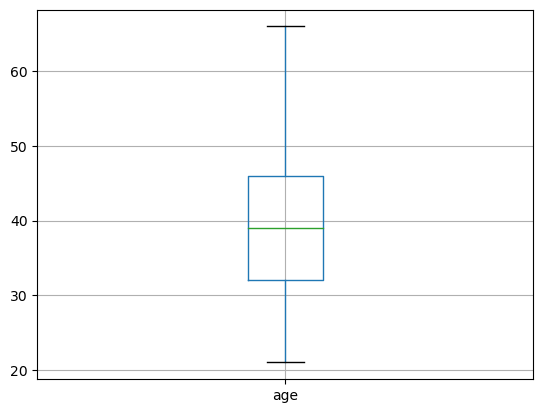

In [78]:
df = df[(df['age'] > lower_limit) & (df['age'] < upper_limit)]
df.boxplot(column=['age'])

In [79]:
cal_Q1 = df["Total Income Amount (Month)"].quantile(0.25)
cal_Q3 = df["Total Income Amount (Month)"].quantile(0.75)
cal_IQR = cal_Q3 - cal_Q1
cal_IQR

11000.0

In [80]:
lower_limit = cal_Q1 - 1.5 * cal_IQR
upper_limit = cal_Q3 + 1.5 * cal_IQR
print('lower:', lower_limit, 'upper:', upper_limit)

lower: -2500.0 upper: 41500.0


<AxesSubplot:>

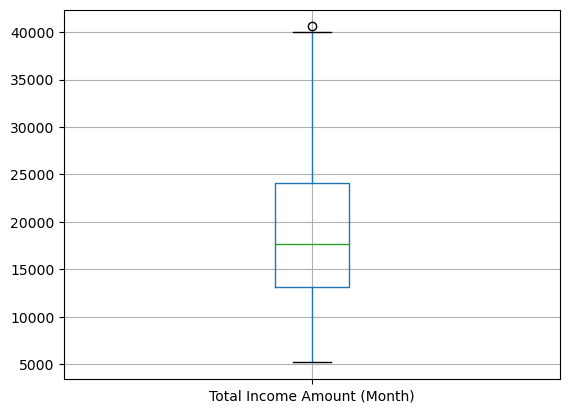

In [81]:
df = df[(df['Total Income Amount (Month)'] > lower_limit) & (df['Total Income Amount (Month)'] < upper_limit)]
df.boxplot(column=['Total Income Amount (Month)'])

In [82]:
df['Total Income Amount (Month)'].max()

40590.0

In [83]:
df['Total Income Amount (Month)'].min()

5200.0

In [84]:
cal_Q1 = df["Total Income Amount (Month)"].quantile(0.25)
cal_Q3 = df["Total Income Amount (Month)"].quantile(0.75)
cal_IQR = cal_Q3 - cal_Q1
cal_IQR

10990.0

In [85]:
lower_limit = cal_Q1 - 1.5 * cal_IQR
upper_limit = cal_Q3 + 1.5 * cal_IQR
print('lower:', lower_limit, 'upper:', upper_limit)

lower: -3385.0 upper: 40575.0


<AxesSubplot:>

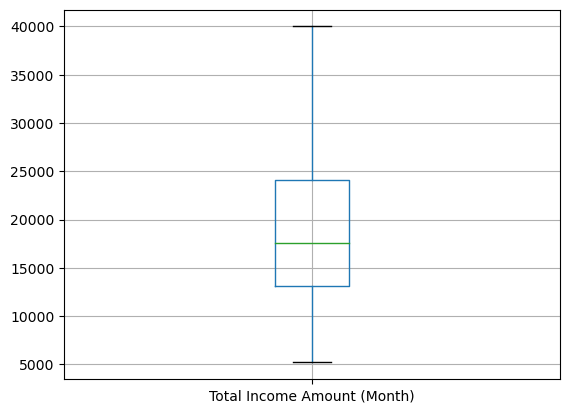

In [86]:
df = df[(df['Total Income Amount (Month)'] > lower_limit) & (df['Total Income Amount (Month)'] < upper_limit)]
df.boxplot(column=['Total Income Amount (Month)'])

In [87]:
df['Total Income Amount (Month)'].min()

5200.0

In [88]:
df['Total Income Amount (Month)'].max()

40000.0

In [89]:
df.describe().round(2)

,Principal Approve Amount,Principal Amount,Repayment Tenor Month Number,Total Income Amount (Month),Vehicle Release Year,Evaluation Amount,age,Vehicle Age
count,1748.00,1748.00,1748.00,1748.00,1748.00,1748.00,1748.00,1748.00
mean,75021.29,70099.16,35.87,19132.15,2012.92,113207.89,39.57,10.08
std,92427.27,89647.53,15.93,7845.95,5.06,135153.69,9.89,5.06
min,3000.00,0.00,12.00,5200.00,1994.00,10000.00,21.00,1.00
25%,20000.00,18483.01,24.00,13087.50,2010.00,33000.00,32.00,6.00
50%,29000.00,27378.36,36.00,17600.00,2013.00,41500.00,39.00,10.00
75%,108625.00,97963.45,48.00,24060.00,2017.00,186000.00,46.00,13.00
max,700000.00,700000.00,60.00,40000.00,2022.00,1190000.00,66.00,29.00


In [90]:
cal_Q1 = df["Vehicle Age"].quantile(0.25)
cal_Q3 = df["Vehicle Age"].quantile(0.75)
cal_IQR = cal_Q3 - cal_Q1
cal_IQR

7.0

In [91]:
lower_limit = cal_Q1 - 1.5 * cal_IQR
upper_limit = cal_Q3 + 1.5 * cal_IQR
print('lower:', lower_limit, 'upper:', upper_limit)

lower: -4.5 upper: 23.5


<AxesSubplot:>

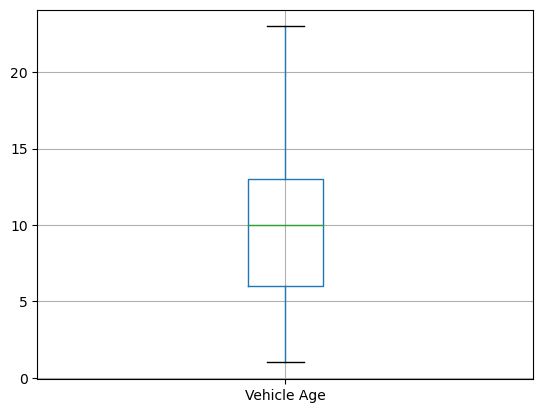

In [92]:
df = df[(df['Vehicle Age'] > lower_limit) & (df['Vehicle Age'] < upper_limit)]
df.boxplot(column=['Vehicle Age'])

In [93]:
df.describe().round(2)

,Principal Approve Amount,Principal Amount,Repayment Tenor Month Number,Total Income Amount (Month),Vehicle Release Year,Evaluation Amount,age,Vehicle Age
count,1731.00,1731.00,1731.00,1731.00,1731.00,1731.00,1731.00,1731.00
mean,75516.65,70564.03,35.95,19124.49,2013.08,113463.26,39.54,9.92
std,92742.46,89960.14,15.96,7842.22,4.81,135773.13,9.90,4.81
min,3000.00,0.00,12.00,5200.00,2000.00,10000.00,21.00,1.00
25%,20000.00,18466.68,24.00,13190.00,2010.00,33000.00,32.00,6.00
50%,29000.00,27403.23,36.00,17500.00,2013.00,41000.00,39.00,10.00
75%,110000.00,99855.58,48.00,24000.00,2017.00,190000.00,46.00,13.00
max,700000.00,700000.00,60.00,40000.00,2022.00,1190000.00,66.00,23.00


###Data Visualize

####Categorical

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1731 entries, 0 to 43073
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Application Number             1731 non-null   object        
 1   Principal Approve Amount       1731 non-null   float64       
 2   Principal Amount               1731 non-null   float64       
 3   Repayment Tenor Month Number   1731 non-null   int32         
 4   Gender                         1731 non-null   object        
 5   DOB                            1731 non-null   datetime64[ns]
 6   Occupation Description         1731 non-null   object        
 7   Total Income Amount (Month)    1731 non-null   float64       
 8   Collateral Type Code           1731 non-null   object        
 9   Vehicle Brand                  1731 non-null   object        
 10  Vehicle Model                  1731 non-null   object        
 11  Vehicle Release 

c:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

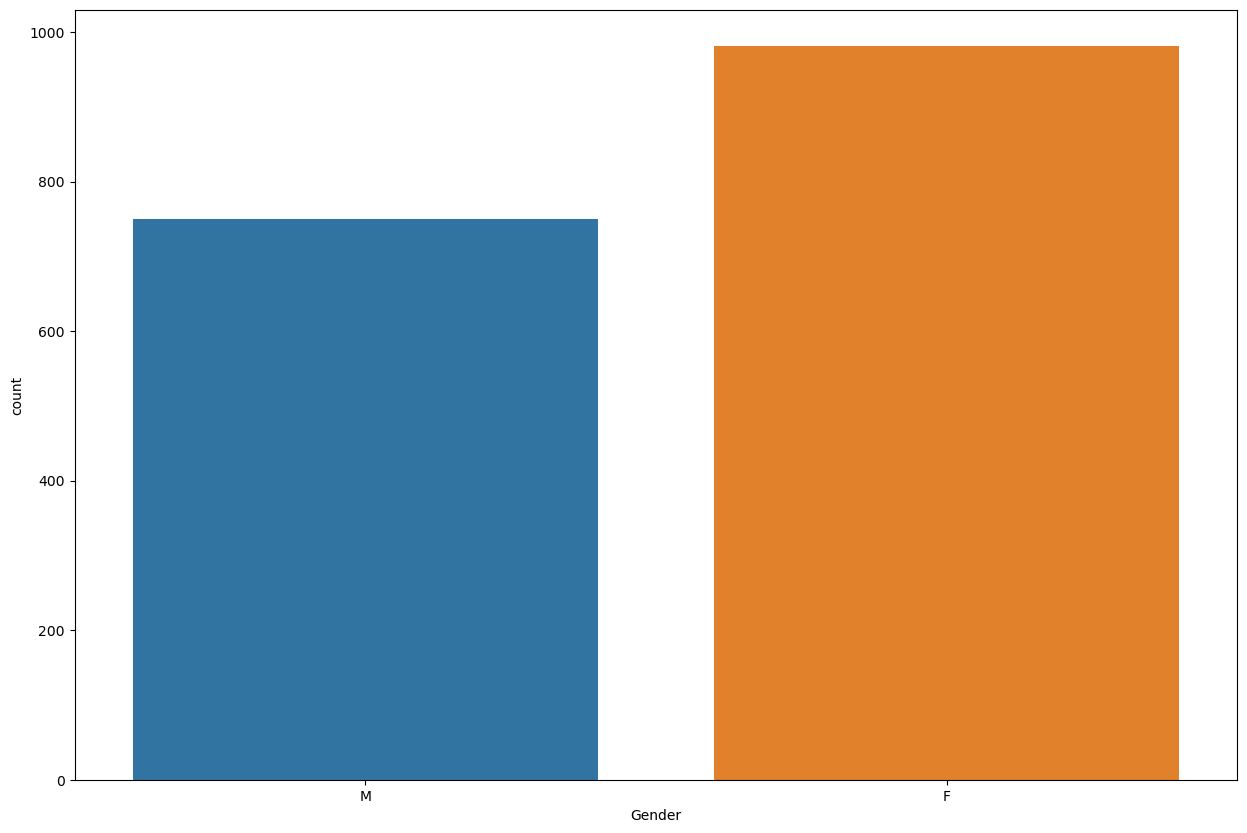

In [95]:
plt.figure(figsize=(15,10))
sns.countplot(df['Gender'])

In [96]:
plt.rcParams['font.family']='Tahoma'
plt.rcParams['font.size']=13

c:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupation Description', ylabel='count'>

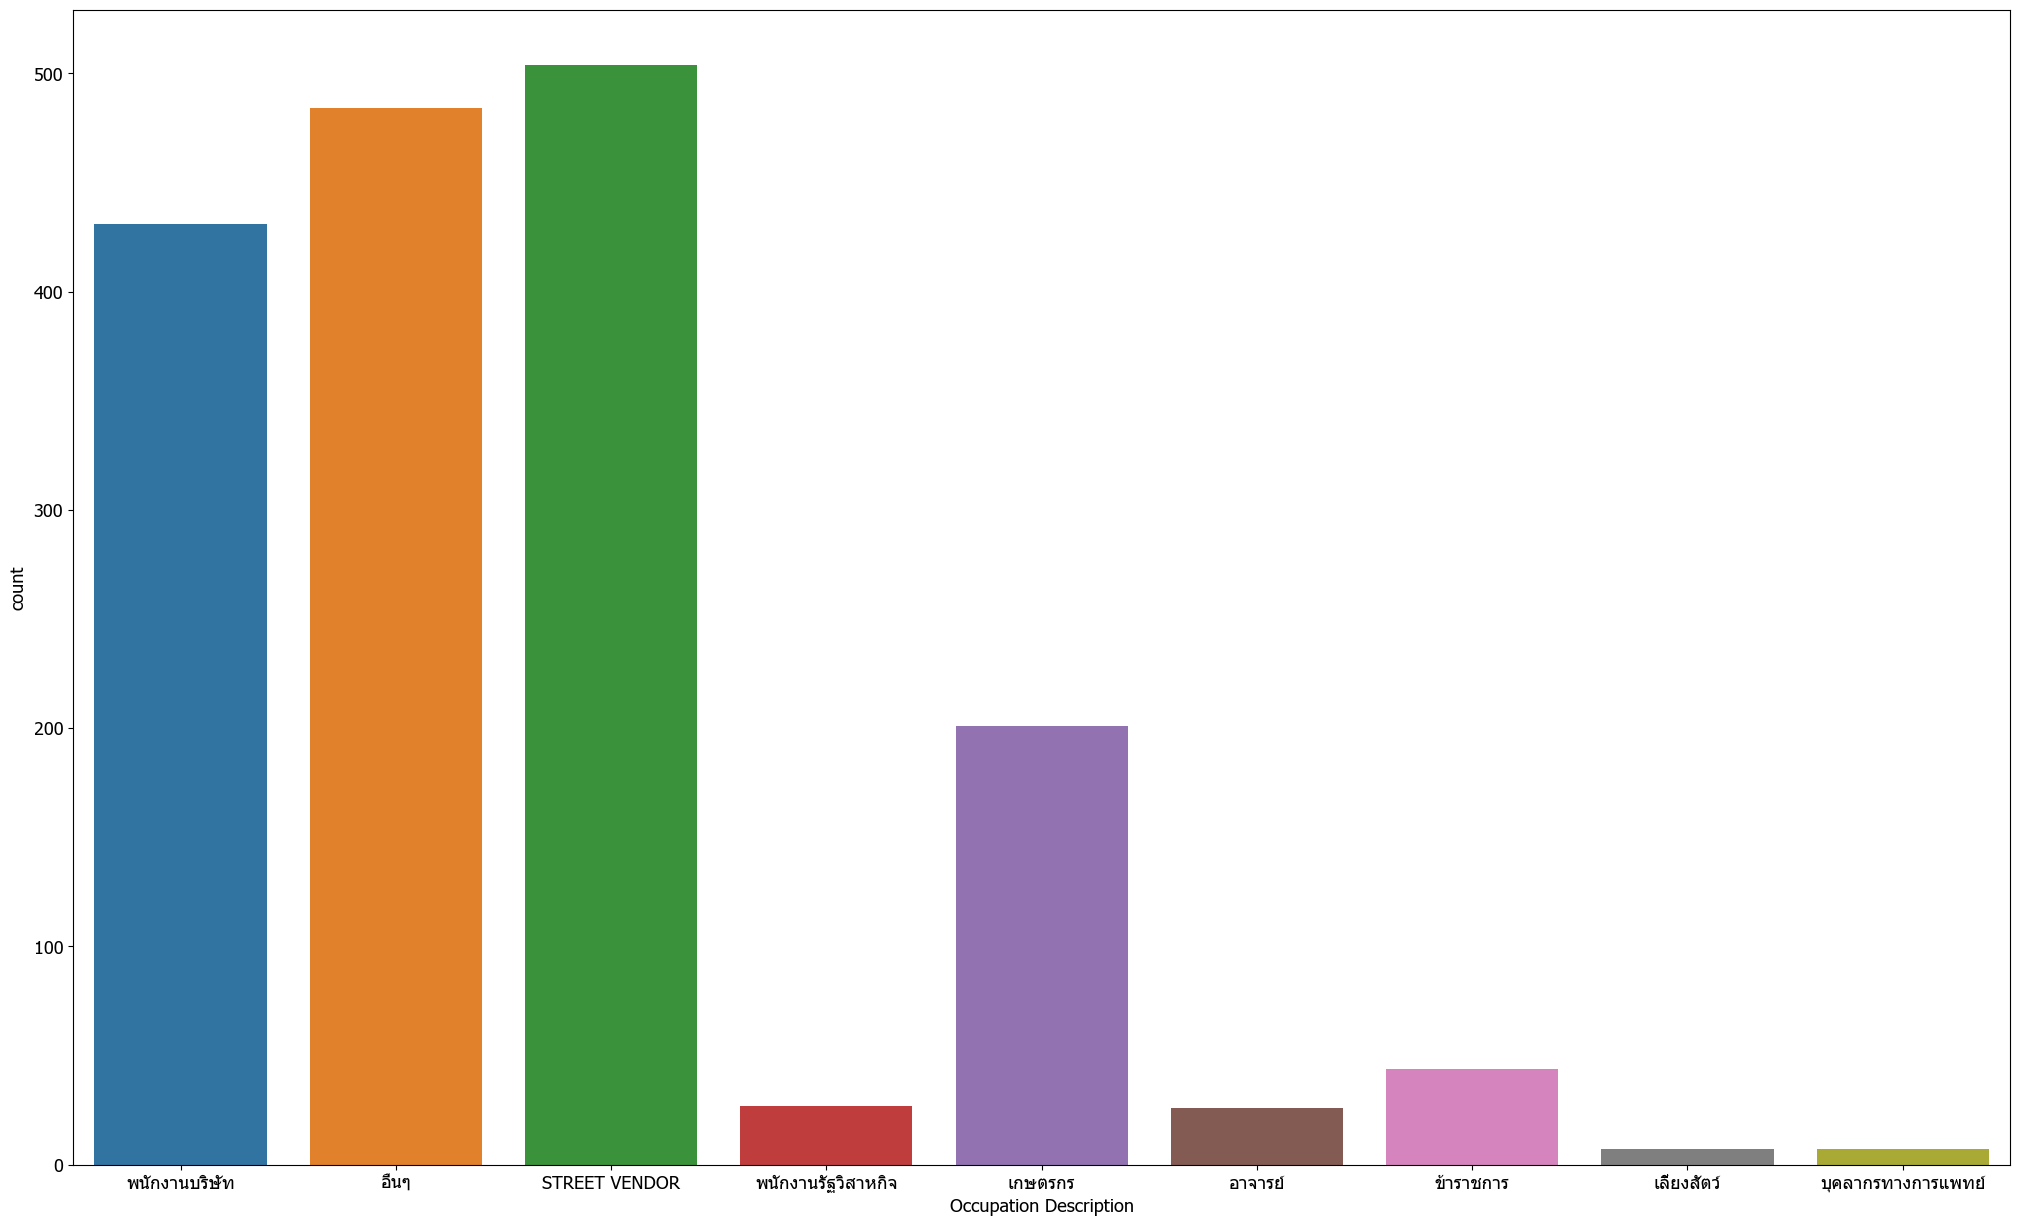

In [97]:
plt.figure(figsize=(25,15))
sns.countplot(df['Occupation Description'])

c:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Vehicle Age', ylabel='count'>

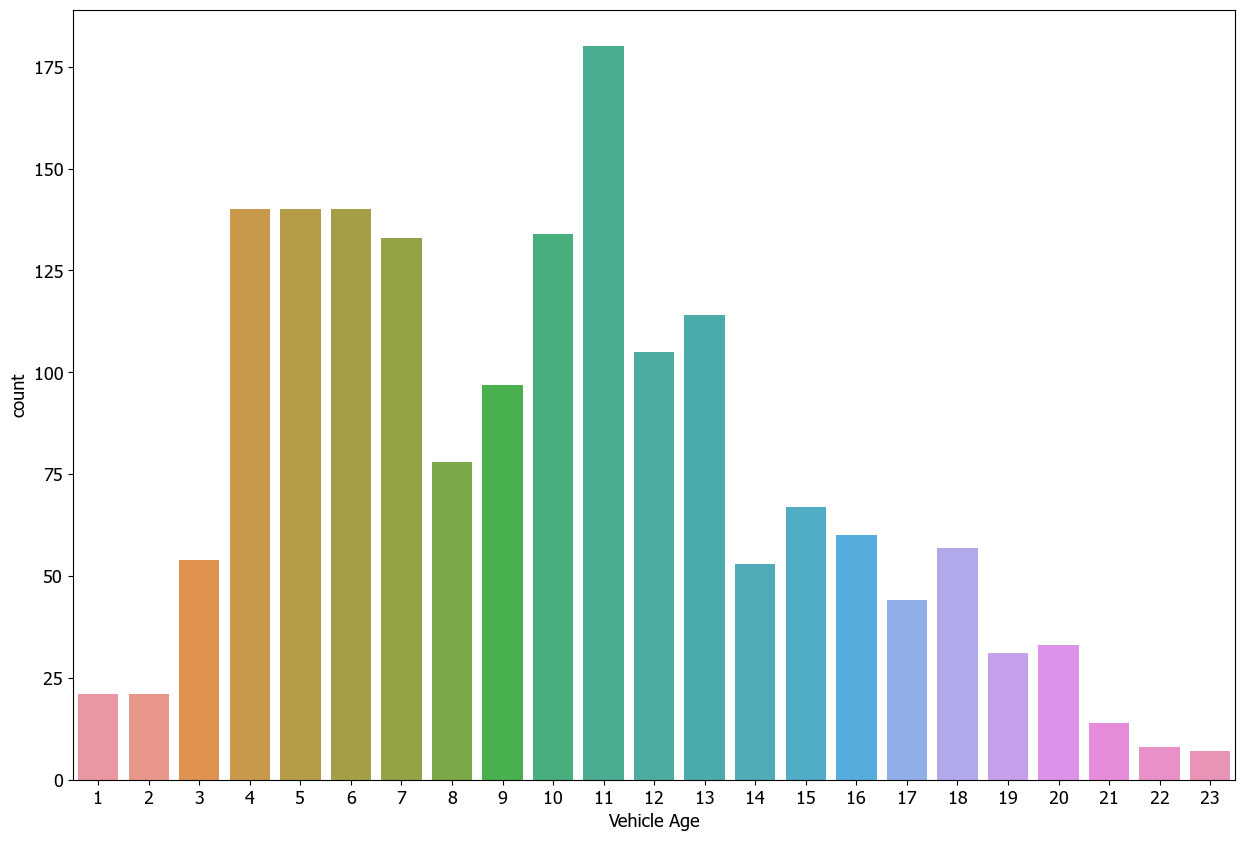

In [98]:
plt.figure(figsize=(15,10))
sns.countplot(df['Vehicle Age'])

c:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Collateral Type Code', ylabel='count'>

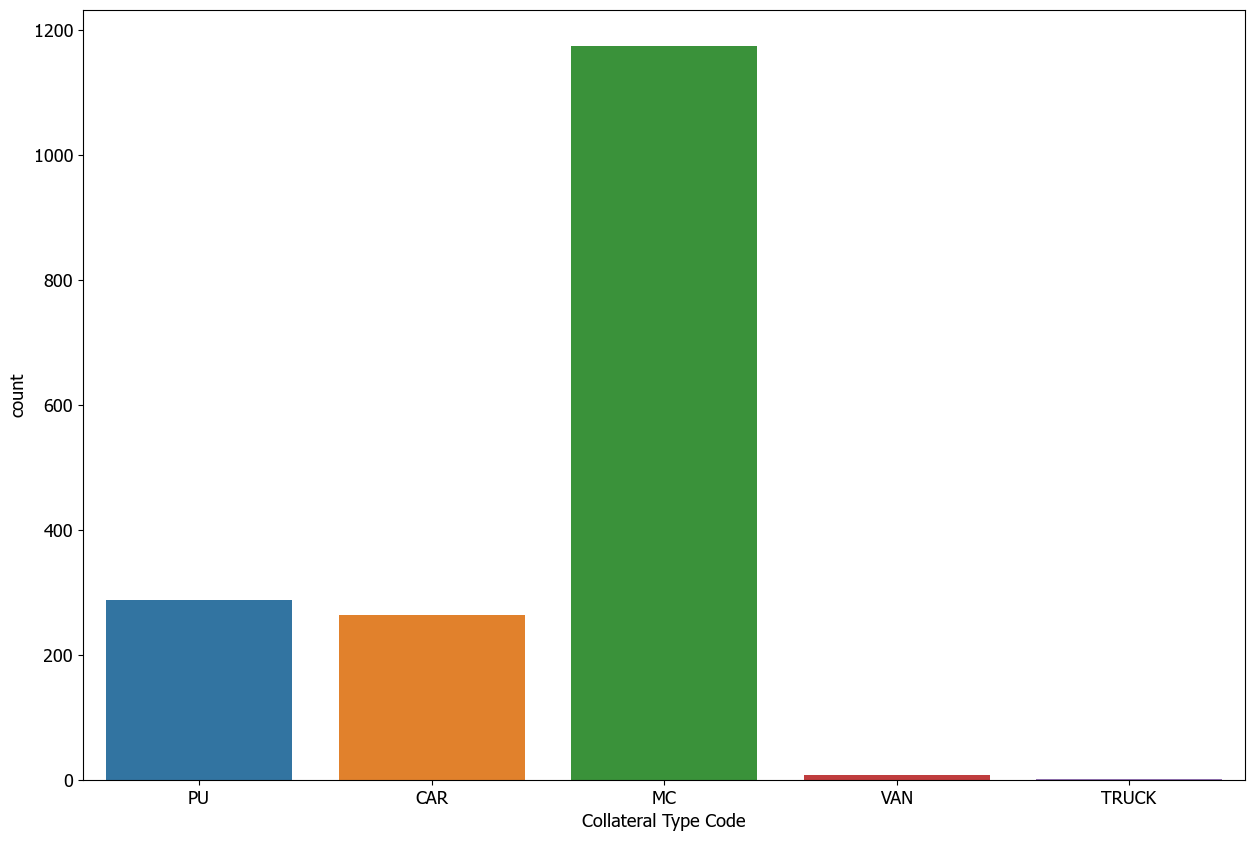

In [99]:
plt.figure(figsize=(15,10))
sns.countplot(df['Collateral Type Code'])

c:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Vehicle Brand', ylabel='count'>

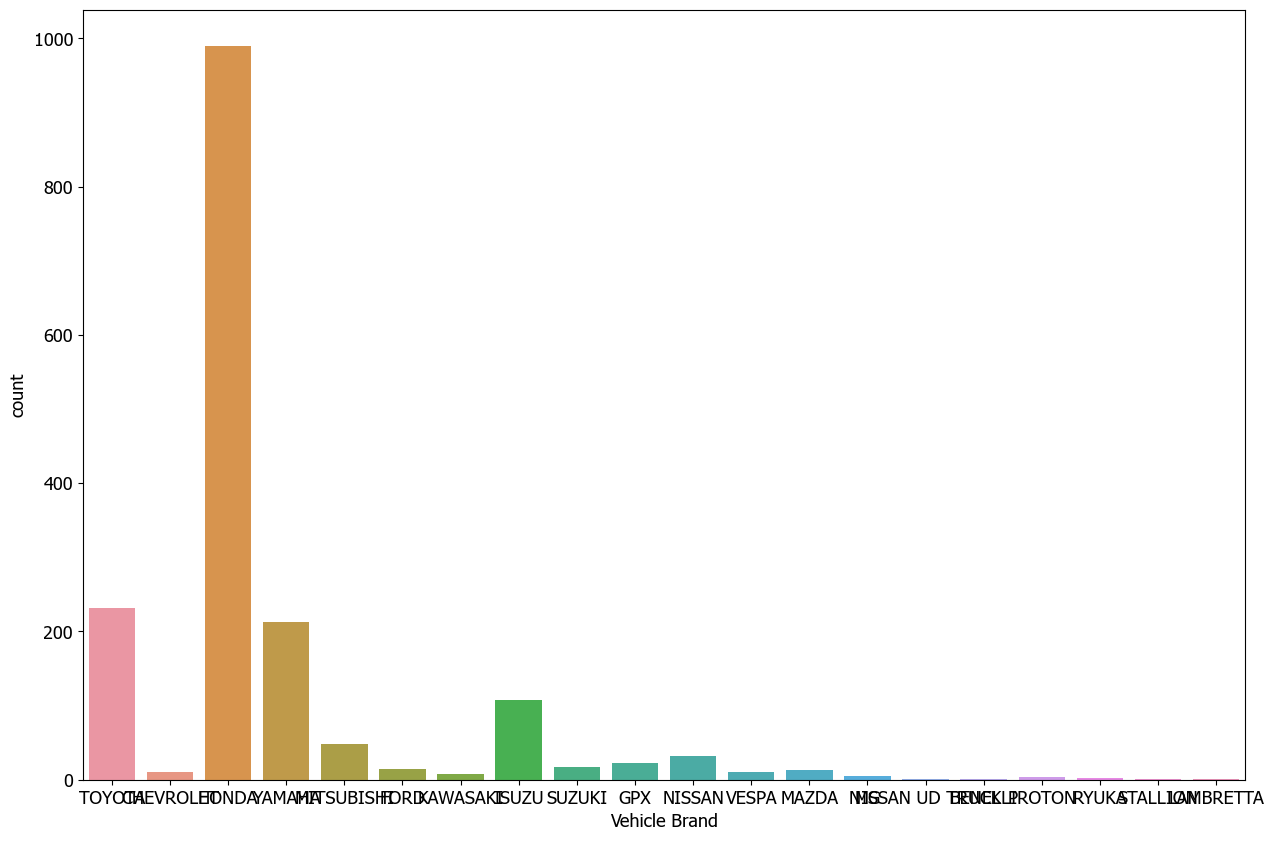

In [100]:
plt.figure(figsize=(15,10))
sns.countplot(df['Vehicle Brand'])

c:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='System CAR Code (Daily)', ylabel='count'>

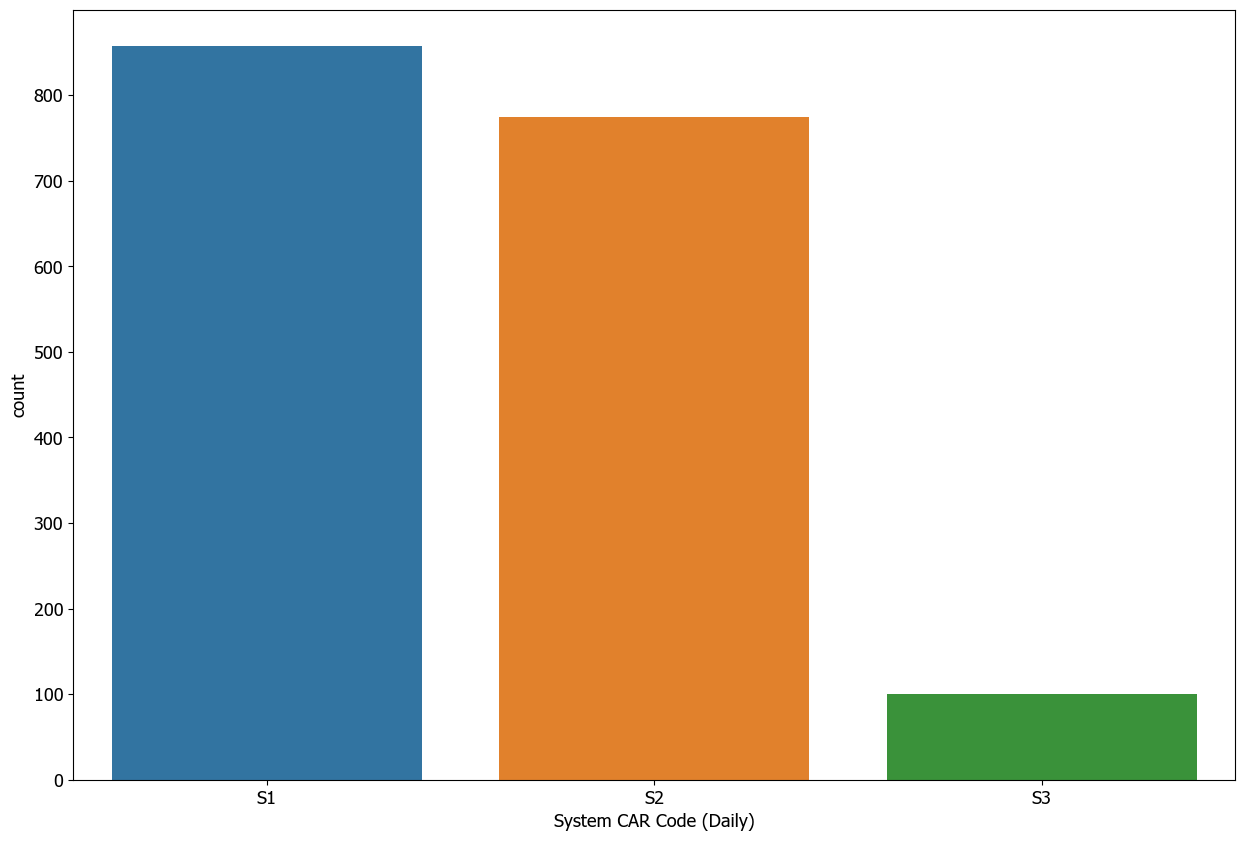

In [101]:
plt.figure(figsize=(15,10))
sns.countplot(df['System CAR Code (Daily)'])

c:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='count'>

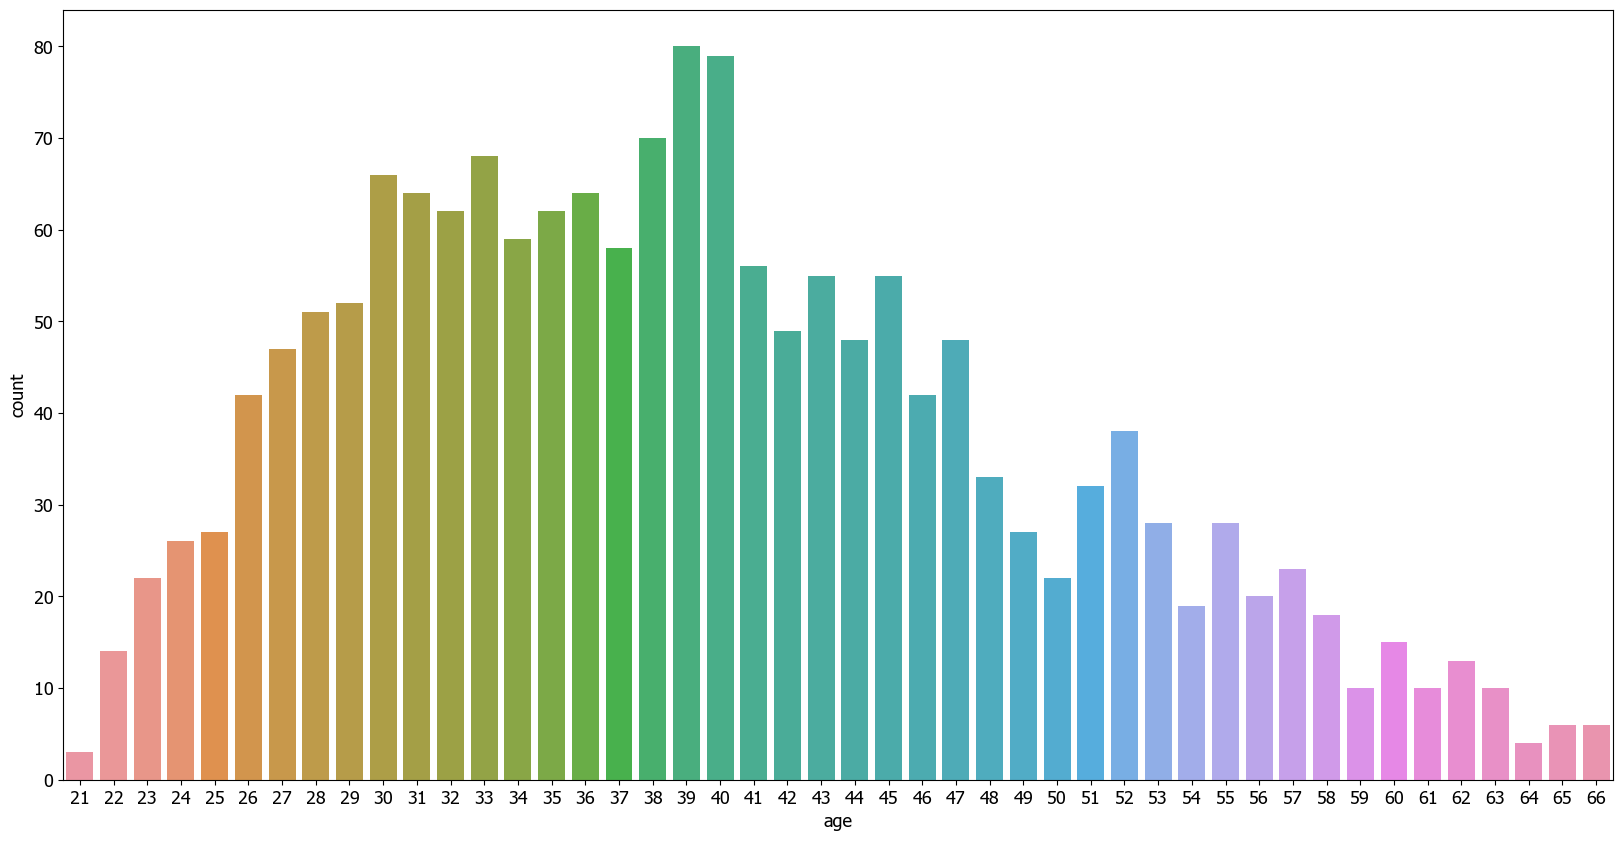

In [102]:
plt.figure(figsize=(20,10))
sns.countplot(df['age'])

c:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Application Status', ylabel='count'>

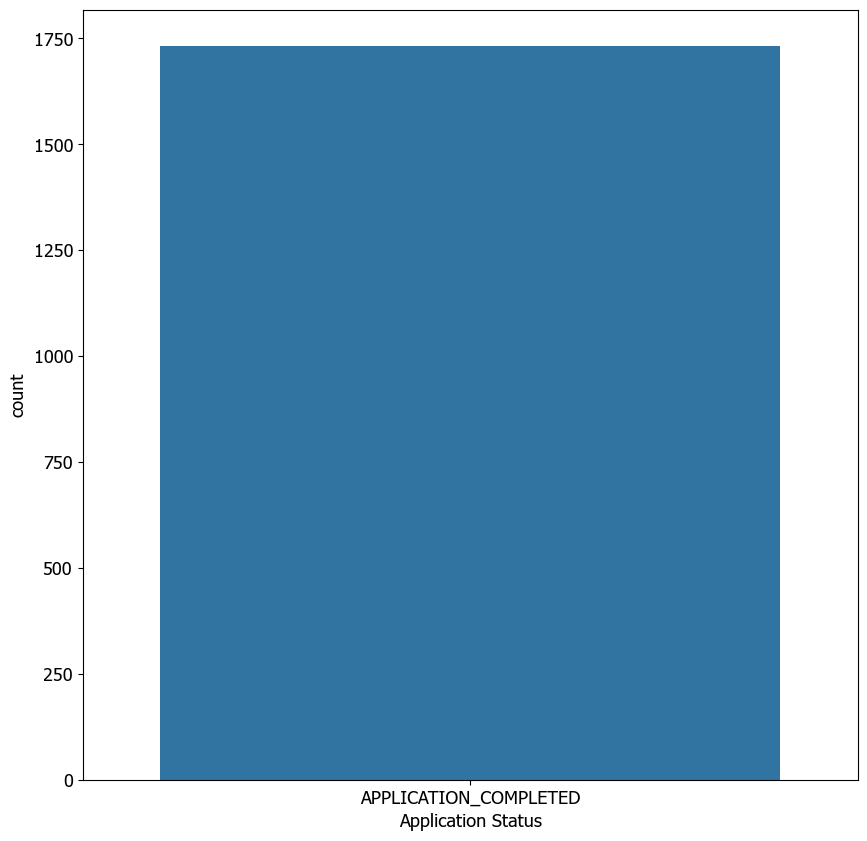

In [103]:
plt.figure(figsize=(10,10))
sns.countplot(df['Application Status'])

####numerical

c:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

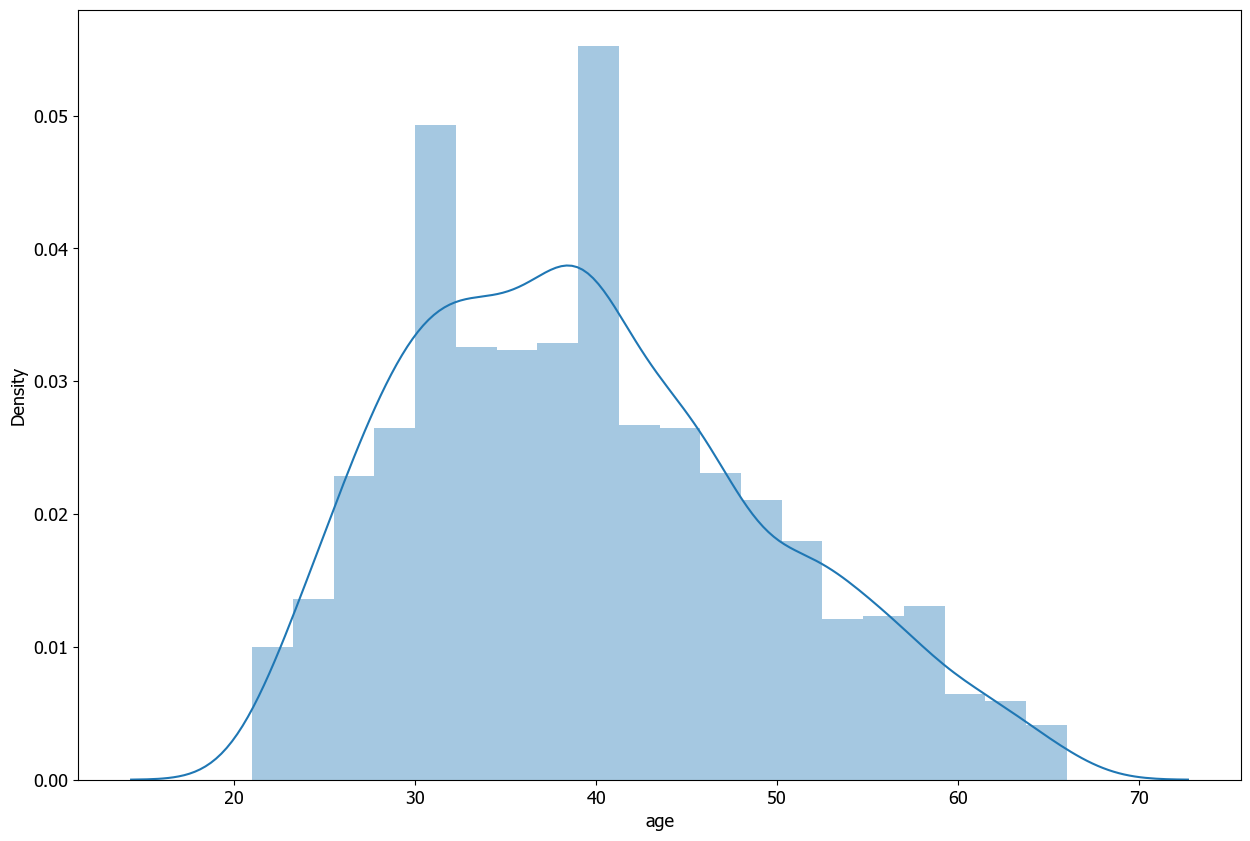

In [104]:
plt.figure(figsize=(15,10))
sns.distplot(df['age'])

c:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Principal Amount', ylabel='Density'>

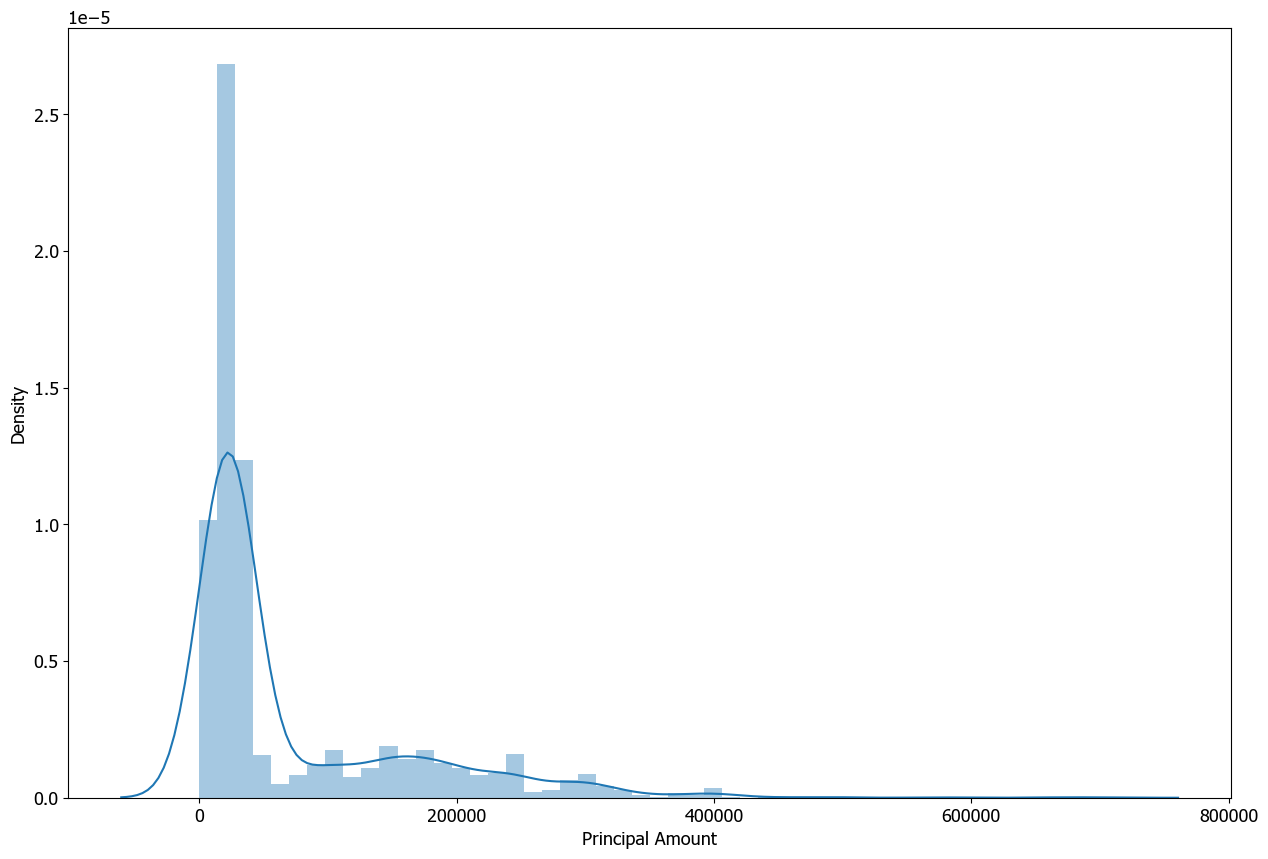

In [105]:
plt.figure(figsize=(15,10))
sns.distplot(df['Principal Amount'])

c:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Repayment Tenor Month Number', ylabel='Density'>

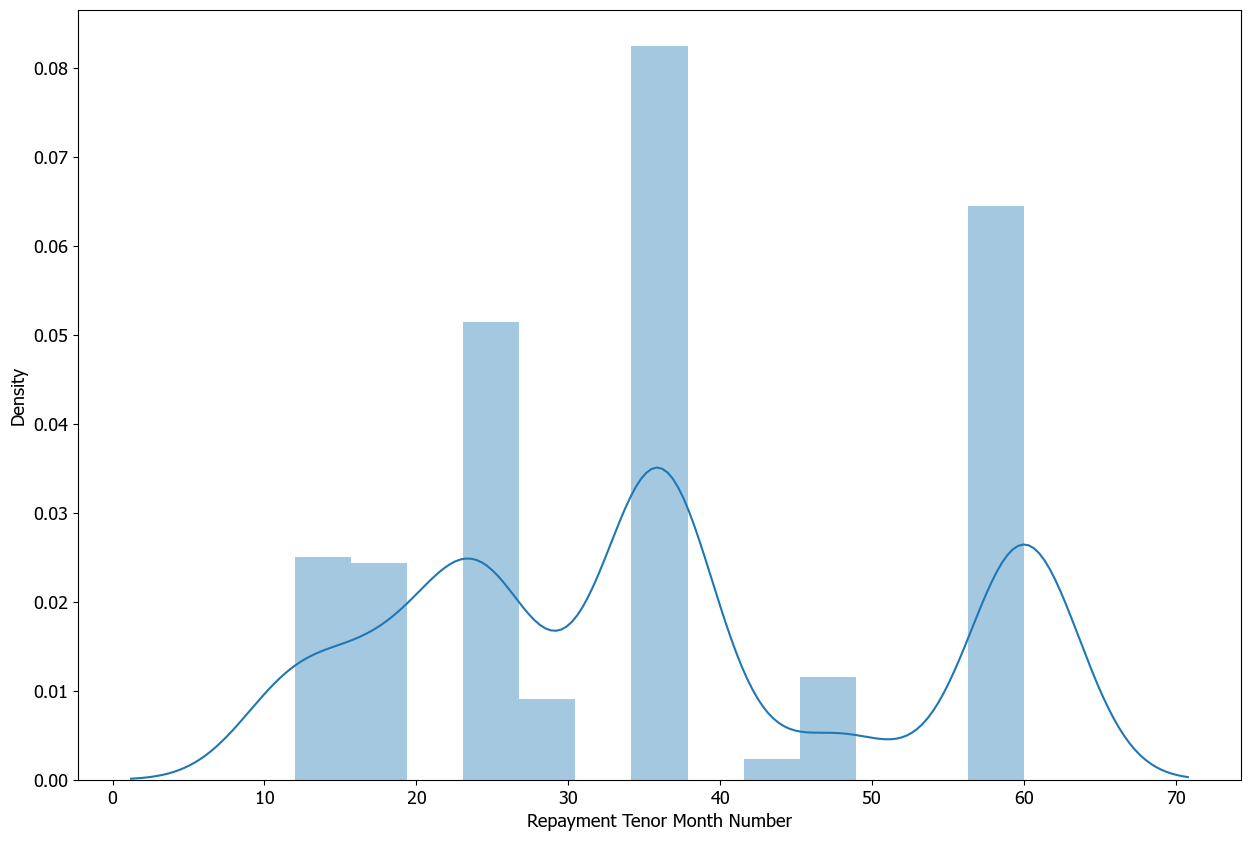

In [106]:
plt.figure(figsize=(15,10))
sns.distplot(df['Repayment Tenor Month Number'])

c:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total Income Amount (Month)', ylabel='Density'>

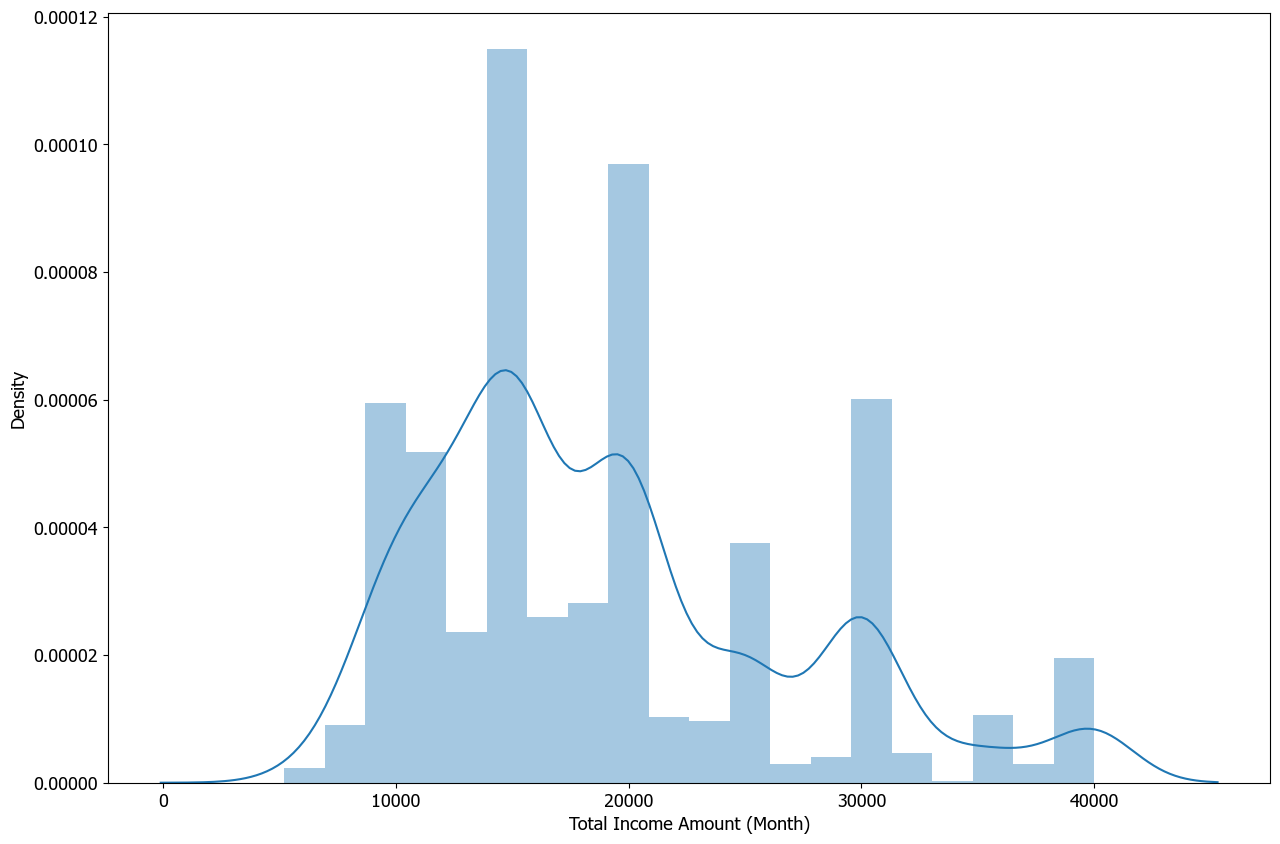

In [107]:
plt.figure(figsize=(15,10))
sns.distplot(df['Total Income Amount (Month)'])

In [108]:
train_df = df.drop(columns=['Application Number']) ## Dropping Application Number
categorical_columns = ['Gender','Occupation Description','Vehicle Age','Collateral Type Code','Vehicle Brand','System CAR Code (Daily)','age','Application Status']

print(categorical_columns)
numerical_columns = ['age','Principal Amount', 'Repayment Tenor Month Number','Total Income Amount (Month)']
print(numerical_columns)

['Gender', 'Occupation Description', 'Vehicle Age', 'Collateral Type Code', 'Vehicle Brand', 'System CAR Code (Daily)', 'age', 'Application Status']
['age', 'Principal Amount', 'Repayment Tenor Month Number', 'Total Income Amount (Month)']


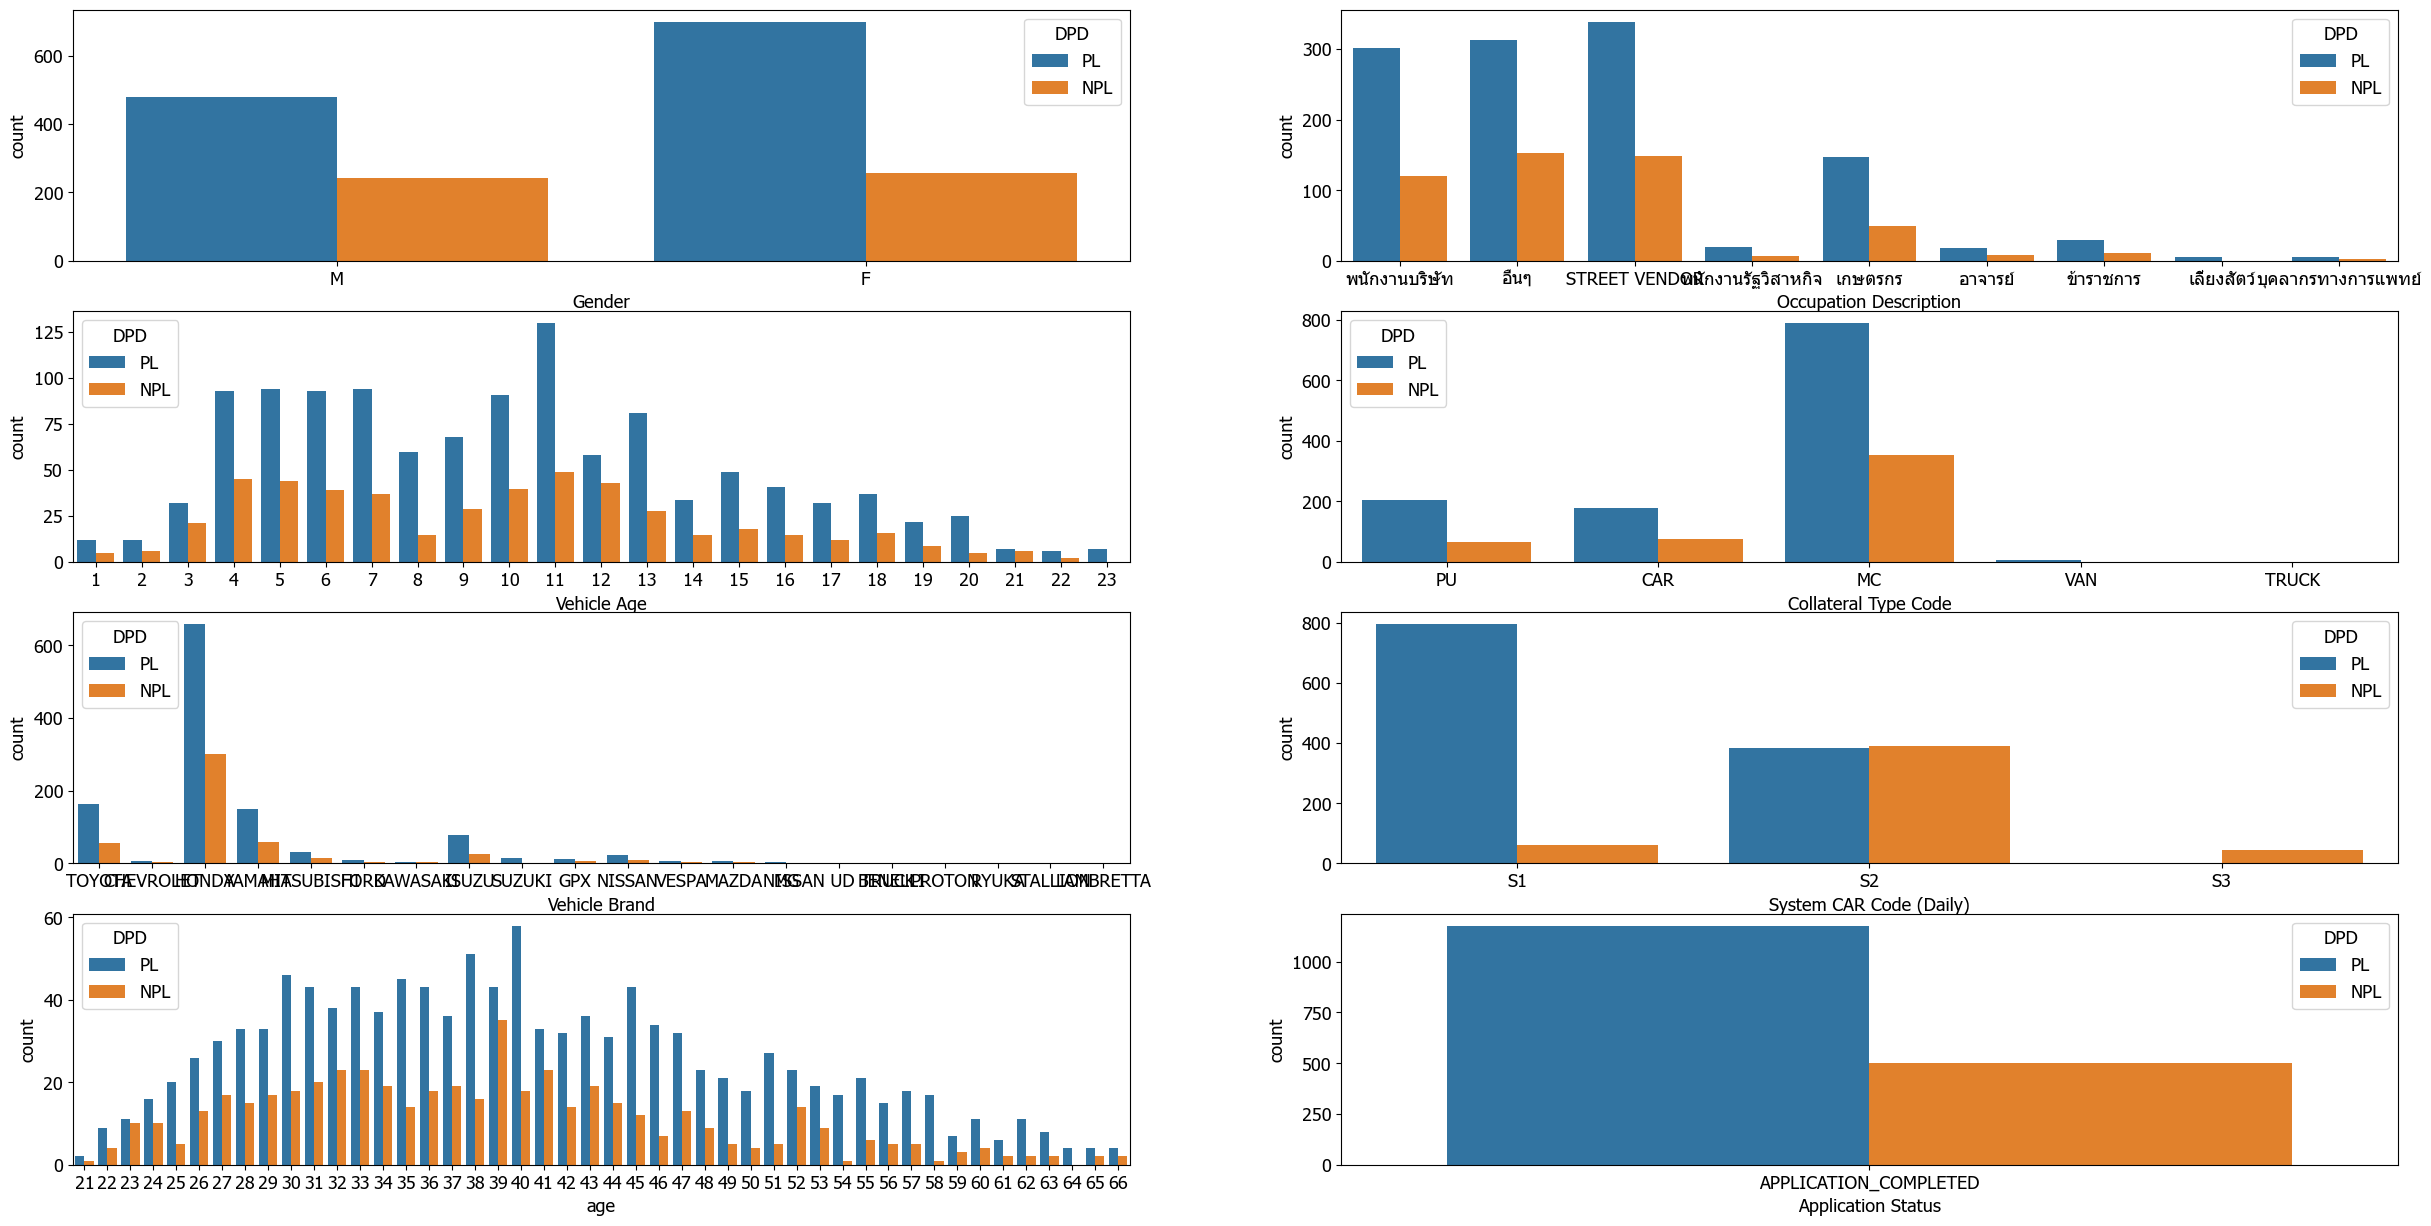

In [109]:
### Data Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt


fig,axes = plt.subplots(4,2,figsize=(30,15))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=train_df,hue='DPD',ax=axes[row,col])


#plt.subplots_adjust(hspace=1)

IndexError: index 3 is out of bounds for axis 0 with size 3

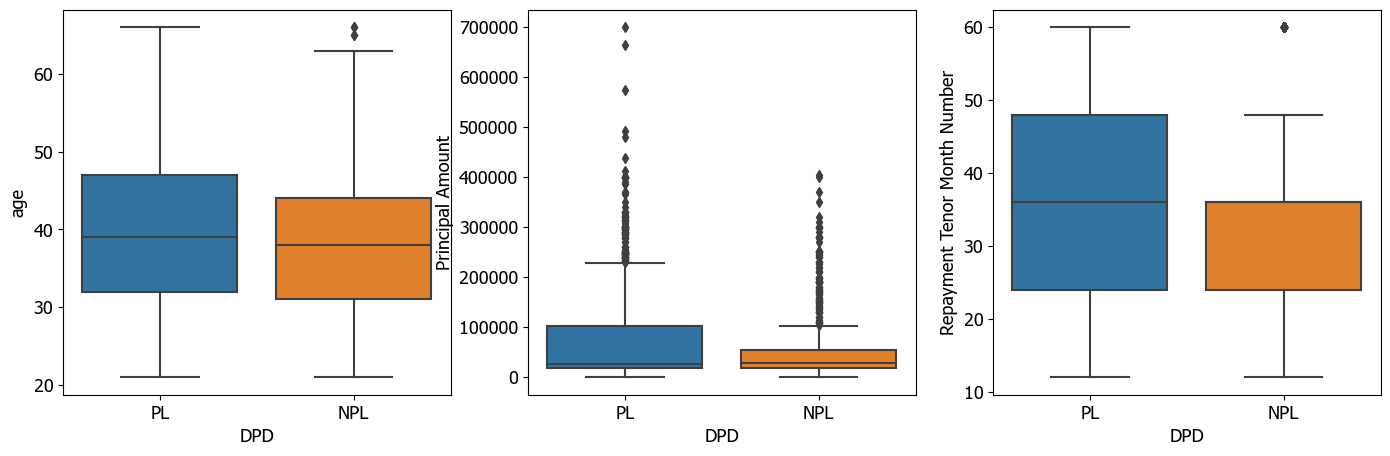

In [110]:
fig,axes = plt.subplots(1,3,figsize=(17,5))
for idx,cat_col in enumerate(numerical_columns):
    sns.boxplot(y=cat_col,data=train_df,x='DPD',ax=axes[idx])

print(train_df[numerical_columns].describe())
plt.subplots_adjust(hspace=1)

In [111]:
df.columns

Index(['Application Number', 'Principal Approve Amount', 'Principal Amount',
       'Repayment Tenor Month Number', 'Gender', 'DOB',
       'Occupation Description', 'Total Income Amount (Month)',
       'Collateral Type Code', 'Vehicle Brand', 'Vehicle Model',
       'Vehicle Release Year', 'Vehicle Sub Model', 'Evaluation Amount',
       'System CAR Code (Daily)', 'System CAR Code Date',
       'Final CAR Code Previous Month', 'DPD', 'Application Status', 'age',
       'Vehicle Age'],
      dtype='object')

In [112]:
cols = ['Principal Approve Amount','Principal Amount','Total Income Amount (Month)','Repayment Tenor Month Number','age','Vehicle Age']

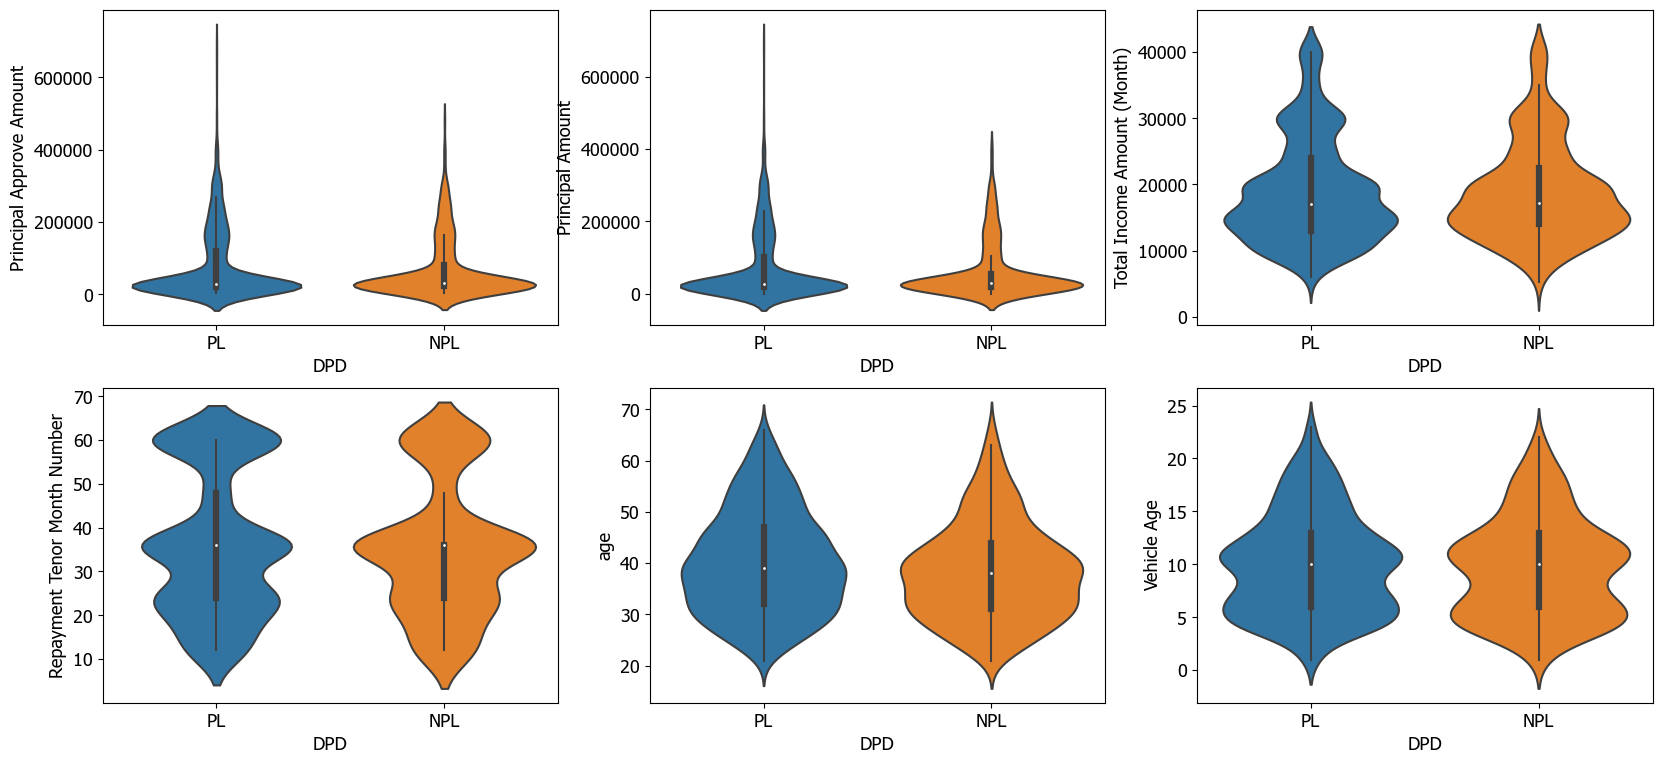

In [113]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20,9))
ax = ax.ravel()
for i, col in enumerate(cols):
    sns.violinplot(x='DPD', y=col, data=df, ax=ax[i])

###correlation matrix

In [114]:
corr = df.corr()
corr

,Principal Approve Amount,Principal Amount,Repayment Tenor Month Number,Total Income Amount (Month),Vehicle Release Year,Evaluation Amount,age,Vehicle Age
Principal Approve Amount,1.000000,0.932881,0.754932,0.382416,-0.184249,0.945270,0.072775,0.184249
Principal Amount,0.932881,1.000000,0.719126,0.370169,-0.196166,0.882780,0.070239,0.196166
Repayment Tenor Month Number,0.754932,0.719126,1.000000,0.273081,-0.286990,0.713151,0.043647,0.286990
Total Income Amount (Month),0.382416,0.370169,0.273081,1.000000,-0.088843,0.393912,0.097974,0.088843
Vehicle Release Year,-0.184249,-0.196166,-0.286990,-0.088843,1.000000,-0.204930,-0.148019,-1.000000
Evaluation Amount,0.945270,0.882780,0.713151,0.393912,-0.204930,1.000000,0.086633,0.204930
age,0.072775,0.070239,0.043647,0.097974,-0.148019,0.086633,1.000000,0.148019
Vehicle Age,0.184249,0.196166,0.286990,0.088843,-1.000000,0.204930,0.148019,1.000000


In [115]:
df.describe().round(2)

,Principal Approve Amount,Principal Amount,Repayment Tenor Month Number,Total Income Amount (Month),Vehicle Release Year,Evaluation Amount,age,Vehicle Age
count,1731.00,1731.00,1731.00,1731.00,1731.00,1731.00,1731.00,1731.00
mean,75516.65,70564.03,35.95,19124.49,2013.08,113463.26,39.54,9.92
std,92742.46,89960.14,15.96,7842.22,4.81,135773.13,9.90,4.81
min,3000.00,0.00,12.00,5200.00,2000.00,10000.00,21.00,1.00
25%,20000.00,18466.68,24.00,13190.00,2010.00,33000.00,32.00,6.00
50%,29000.00,27403.23,36.00,17500.00,2013.00,41000.00,39.00,10.00
75%,110000.00,99855.58,48.00,24000.00,2017.00,190000.00,46.00,13.00
max,700000.00,700000.00,60.00,40000.00,2022.00,1190000.00,66.00,23.00


#Modeling

###Drop Columns ที่ไม่ใช้

In [116]:
df.columns

Index(['Application Number', 'Principal Approve Amount', 'Principal Amount',
       'Repayment Tenor Month Number', 'Gender', 'DOB',
       'Occupation Description', 'Total Income Amount (Month)',
       'Collateral Type Code', 'Vehicle Brand', 'Vehicle Model',
       'Vehicle Release Year', 'Vehicle Sub Model', 'Evaluation Amount',
       'System CAR Code (Daily)', 'System CAR Code Date',
       'Final CAR Code Previous Month', 'DPD', 'Application Status', 'age',
       'Vehicle Age'],
      dtype='object')

In [117]:
df2 = df.copy()

In [118]:
cols = ['Application Number','DOB','Application Status']
df2 = df2.drop(columns=cols, axis=1)

In [119]:
df2.head(2)

,Principal Approve Amount,Principal Amount,Repayment Tenor Month Number,Gender,Occupation Description,Total Income Amount (Month),Collateral Type Code,Vehicle Brand,Vehicle Model,Vehicle Release Year,Vehicle Sub Model,Evaluation Amount,System CAR Code (Daily),System CAR Code Date,Final CAR Code Previous Month,DPD,age,Vehicle Age
0,7500.0,0.00,12,M,พนักงานบริษัท,10000.0,PU,TOYOTA,SPORT CRUISER,2002,EP,225500,S1,2022-12-26,S1,PL,31,21
10,30000.0,26618.83,24,M,อื่นๆ,40000.0,CAR,CHEVROLET,AVEO,2012,BT,121000,S1,2022-06-21,S1,PL,29,11


###LabelEncoder

In [120]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1731 entries, 0 to 43073
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Principal Approve Amount       1731 non-null   float64       
 1   Principal Amount               1731 non-null   float64       
 2   Repayment Tenor Month Number   1731 non-null   int32         
 3   Gender                         1731 non-null   object        
 4   Occupation Description         1731 non-null   object        
 5   Total Income Amount (Month)    1731 non-null   float64       
 6   Collateral Type Code           1731 non-null   object        
 7   Vehicle Brand                  1731 non-null   object        
 8   Vehicle Model                  1731 non-null   object        
 9   Vehicle Release Year           1731 non-null   int64         
 10  Vehicle Sub Model              1731 non-null   object        
 11  Evaluation Amoun

In [121]:
from sklearn.preprocessing import LabelEncoder
#cols = ['Gender','Occupation Description','Collateral Type Code','Vehicle Brand','Vehicle Model']
cols = ['Occupation Description','Collateral Type Code','Vehicle Brand','Vehicle Model']

le = LabelEncoder()
for col in cols:
    df2[col] = le.fit_transform(df2[col])

TypeError: Encoders require their input to be uniformly strings or numbers. Got ['int', 'str']

In [122]:
df2.head(5)

,Principal Approve Amount,Principal Amount,Repayment Tenor Month Number,Gender,Occupation Description,Total Income Amount (Month),Collateral Type Code,Vehicle Brand,Vehicle Model,Vehicle Release Year,Vehicle Sub Model,Evaluation Amount,System CAR Code (Daily),System CAR Code Date,Final CAR Code Previous Month,DPD,age,Vehicle Age
0,7500.0,0.00,12,M,3,10000.0,2,17,SPORT CRUISER,2002,EP,225500,S1,2022-12-26,S1,PL,31,21
10,30000.0,26618.83,24,M,6,40000.0,0,1,AVEO,2012,BT,121000,S1,2022-06-21,S1,PL,29,11
22,20000.0,18434.00,12,M,6,15000.0,1,4,WAVE 110I,2019,DB,34500,S2,2023-01-10,S3,NPL,29,4
59,165000.0,0.00,60,M,0,30000.0,0,17,VIOS,2010,DZ,240000,S1,2023-01-10,S2,NPL,33,13
61,28000.0,26483.19,24,F,6,15000.0,1,4,DREAM 110,2015,CC,44000,S2,2022-11-27,S1,NPL,34,8


In [123]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1731 entries, 0 to 43073
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Principal Approve Amount       1731 non-null   float64       
 1   Principal Amount               1731 non-null   float64       
 2   Repayment Tenor Month Number   1731 non-null   int32         
 3   Gender                         1731 non-null   object        
 4   Occupation Description         1731 non-null   int32         
 5   Total Income Amount (Month)    1731 non-null   float64       
 6   Collateral Type Code           1731 non-null   int32         
 7   Vehicle Brand                  1731 non-null   int32         
 8   Vehicle Model                  1731 non-null   object        
 9   Vehicle Release Year           1731 non-null   int64         
 10  Vehicle Sub Model              1731 non-null   object        
 11  Evaluation Amoun

In [124]:
corr = df2.corr()
corr

,Principal Approve Amount,Principal Amount,Repayment Tenor Month Number,Occupation Description,Total Income Amount (Month),Collateral Type Code,Vehicle Brand,Vehicle Release Year,Evaluation Amount,age,Vehicle Age
Principal Approve Amount,1.000000,0.932881,0.754932,-0.064402,0.382416,0.268132,0.238230,-0.184249,0.945270,0.072775,0.184249
Principal Amount,0.932881,1.000000,0.719126,-0.059244,0.370169,0.254419,0.228390,-0.196166,0.882780,0.070239,0.196166
Repayment Tenor Month Number,0.754932,0.719126,1.000000,-0.073487,0.273081,0.108311,0.183346,-0.286990,0.713151,0.043647,0.286990
Occupation Description,-0.064402,-0.059244,-0.073487,1.000000,-0.253579,0.087089,-0.088517,0.010561,-0.042992,0.037410,-0.010561
Total Income Amount (Month),0.382416,0.370169,0.273081,-0.253579,1.000000,0.063263,0.131138,-0.088843,0.393912,0.097974,0.088843
Collateral Type Code,0.268132,0.254419,0.108311,0.087089,0.063263,1.000000,0.060364,-0.019669,0.259187,0.096878,0.019669
Vehicle Brand,0.238230,0.228390,0.183346,-0.088517,0.131138,0.060364,1.000000,-0.184429,0.231468,0.082790,0.184429
Vehicle Release Year,-0.184249,-0.196166,-0.286990,0.010561,-0.088843,-0.019669,-0.184429,1.000000,-0.204930,-0.148019,-1.000000
Evaluation Amount,0.945270,0.882780,0.713151,-0.042992,0.393912,0.259187,0.231468,-0.204930,1.000000,0.086633,0.204930
age,0.072775,0.070239,0.043647,0.037410,0.097974,0.096878,0.082790,-0.148019,0.086633,1.000000,0.148019


<AxesSubplot:>

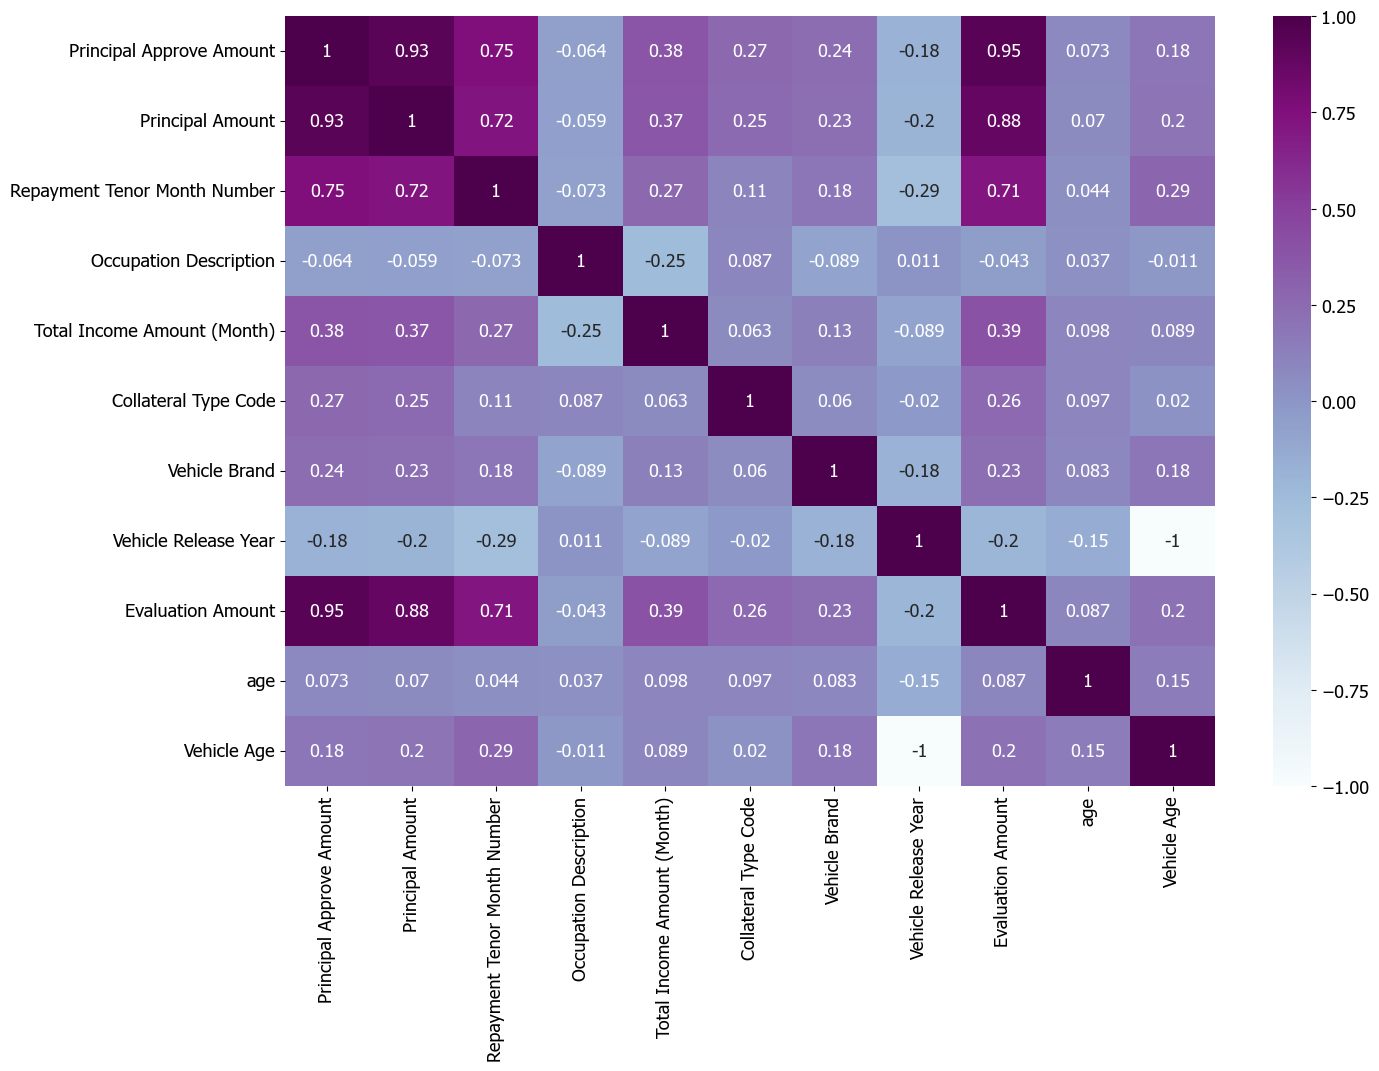

In [125]:
corr = df2.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True, cmap="BuPu")

###ทดลอง Feature Importance

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [127]:
df2.columns

Index(['Principal Approve Amount', 'Principal Amount',
       'Repayment Tenor Month Number', 'Gender', 'Occupation Description',
       'Total Income Amount (Month)', 'Collateral Type Code', 'Vehicle Brand',
       'Vehicle Model', 'Vehicle Release Year', 'Vehicle Sub Model',
       'Evaluation Amount', 'System CAR Code (Daily)', 'System CAR Code Date',
       'Final CAR Code Previous Month', 'DPD', 'age', 'Vehicle Age'],
      dtype='object')

In [128]:
df2.head(2)

,Principal Approve Amount,Principal Amount,Repayment Tenor Month Number,Gender,Occupation Description,Total Income Amount (Month),Collateral Type Code,Vehicle Brand,Vehicle Model,Vehicle Release Year,Vehicle Sub Model,Evaluation Amount,System CAR Code (Daily),System CAR Code Date,Final CAR Code Previous Month,DPD,age,Vehicle Age
0,7500.0,0.00,12,M,3,10000.0,2,17,SPORT CRUISER,2002,EP,225500,S1,2022-12-26,S1,PL,31,21
10,30000.0,26618.83,24,M,6,40000.0,0,1,AVEO,2012,BT,121000,S1,2022-06-21,S1,PL,29,11


In [129]:
df2.columns

Index(['Principal Approve Amount', 'Principal Amount',
       'Repayment Tenor Month Number', 'Gender', 'Occupation Description',
       'Total Income Amount (Month)', 'Collateral Type Code', 'Vehicle Brand',
       'Vehicle Model', 'Vehicle Release Year', 'Vehicle Sub Model',
       'Evaluation Amount', 'System CAR Code (Daily)', 'System CAR Code Date',
       'Final CAR Code Previous Month', 'DPD', 'age', 'Vehicle Age'],
      dtype='object')

In [130]:
#cols = ['Principal Approve Amount', 'Principal Amount','Repayment Tenor Month Number', 'Gender', 'Occupation Description', 'Total Income Amount (Month)', 'Collateral Type Code', 'Vehicle Brand','Vehicle Model', 'Vehicle Release Year', 'Vehicle Sub Model','System CAR Code (Daily)', 'System CAR Code Date','Final CAR Code Previous Month', 'DPD', 'age', 'Vehicle Age']
cols = ['Principal Approve Amount','Principal Amount','Repayment Tenor Month Number','Gender','Occupation Description','Total Income Amount (Month)','Collateral Type Code','Vehicle Brand','Vehicle Model','System CAR Code (Daily)','age','Vehicle Age']

In [131]:
X = df2[cols] #features
y = df2['DPD'] #label

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [133]:
from sklearn import tree


In [134]:
model=DecisionTreeClassifier(criterion='entropy')

model.fit(X_train, y_train)

ValueError: could not convert string to float: 'F'

In [ ]:
X_train.columns

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 3442, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Admin\AppData\Local\Temp\ipykernel_10640\829181101.py", line 1, in <module>
    X_train.columns
NameError: name 'X_train' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 2057, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\ultratb.py", line 1118, in

###Feature Importance

In [ ]:
model.feature_importances_

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 3442, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Admin\AppData\Local\Temp\ipykernel_10640\4242228011.py", line 1, in <module>
    model.feature_importances_
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\tree\_classes.py", line 585, in feature_importances_
    check_is_fitted(self)
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py", line 1390, in check_is_fitted
    raise NotFittedError(msg % {"name": type(estimator).__name__})
sklearn.exceptions.NotFittedError: This DecisionTreeClassifier instance i

In [ ]:
fs = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(
    ascending=False
)
fs

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 3442, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Admin\AppData\Local\Temp\ipykernel_10640\1082727499.py", line 1, in <module>
    fs = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\tree\_classes.py", line 585, in feature_importances_
    check_is_fitted(self)
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py", line 1390, in check_is_fitted
    raise NotFittedError(msg % {"name": type(estimator).__name__})
sklearn.exceptions.No

In [ ]:
fs.sum()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 3442, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Admin\AppData\Local\Temp\ipykernel_10640\4278552607.py", line 1, in <module>
    fs.sum()
NameError: name 'fs' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 2057, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\ultratb.py", line 1118, in structured

In [ ]:
plt.figure(figsize=(15,10))
fs.plot(kind='barh')

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 3442, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Admin\AppData\Local\Temp\ipykernel_10640\3188062362.py", line 2, in <module>
    fs.plot(kind='barh')
NameError: name 'fs' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 2057, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\ultratb.py", line 1118, i

<Figure size 1500x1000 with 0 Axes>

In [ ]:
corr = df2.corr()
corr

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 3442, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Admin\AppData\Local\Temp\ipykernel_10640\809343543.py", line 1, in <module>
    corr = df2.corr()
NameError: name 'df2' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 2057, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\ultratb.py", line 1118, in s

In [ ]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True, cmap="BuPu")

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 3442, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Admin\AppData\Local\Temp\ipykernel_10640\3425438146.py", line 1, in <module>
    corr = df.corr()
NameError: name 'df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 2057, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\ultratb.py", line 1118, in st

In [ ]:
df2

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 3442, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Admin\AppData\Local\Temp\ipykernel_10640\3882145664.py", line 1, in <module>
    df2
NameError: name 'df2' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 2057, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\ultratb.py", line 1118, in structured_tra

#Evaluation

###Drop Cplomns ที่ไม่ใช้ออก

In [ ]:
cols = ['Principal Approve Amount','Vehicle Model', 'Vehicle Release Year', 'Vehicle Sub Model',
       'System CAR Code (Daily)',
       'System CAR Code Date', 'Final CAR Code Previous Month']
df2 = df2.drop(columns=cols, axis=1)
df2.head()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 3442, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Admin\AppData\Local\Temp\ipykernel_10640\3599696658.py", line 4, in <module>
    df2 = df2.drop(columns=cols, axis=1)
NameError: name 'df2' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 2057, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\ultratb.

In [ ]:
X = df2.drop(columns=['DPD'], axis=1)
y = df2['DPD']

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 3442, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Admin\AppData\Local\Temp\ipykernel_10640\4132636202.py", line 1, in <module>
    X = df2.drop(columns=['DPD'], axis=1)
NameError: name 'df2' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 2057, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\ultratb

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 3442, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Admin\AppData\Local\Temp\ipykernel_10640\1622032600.py", line 2, in <module>
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)
NameError: name 'X' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 2057, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-pack

In [ ]:
from sklearn.model_selection import cross_val_score
def classify(model, x,y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)
    model.fit(x_train, y_train)
    print("Accuracy is : ", model.score(x_test, y_test)*100)
    #Cross Calidation
    #eg: cv-5, train-4, test-1
    score = cross_val_score(model, x, y, cv=5)
    print("Cross Validation is ", np.mean(score)*100)

In [ ]:
df2.info()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 3442, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Admin\AppData\Local\Temp\ipykernel_10640\4286376316.py", line 1, in <module>
    df2.info()
NameError: name 'df2' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 2057, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\ultratb.py", line 1118, in structu

In [ ]:
df2.isnull().sum()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 3442, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Admin\AppData\Local\Temp\ipykernel_10640\219765345.py", line 1, in <module>
    df2.isnull().sum()
NameError: name 'df2' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 2057, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\ultratb.py", line 1118, in 

In [ ]:
df2.dropna(subset=['DPD'], inplace=True)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 3442, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Admin\AppData\Local\Temp\ipykernel_10640\4238992574.py", line 1, in <module>
    df2.dropna(subset=['DPD'], inplace=True)
NameError: name 'df2' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 2057, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\ultr

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model,X,y)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 3442, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Admin\AppData\Local\Temp\ipykernel_10640\1250502401.py", line 3, in <module>
    classify(model,X,y)
NameError: name 'X' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 2057, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\ultratb.py", line 1118, in 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model,X,y)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 3442, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Admin\AppData\Local\Temp\ipykernel_10640\940286023.py", line 3, in <module>
    classify(model,X,y)
NameError: name 'X' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 2057, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\ultratb.py", line 1118, in s

In [ ]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
model = RandomForestClassifier()
classify(model,X,y)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 3442, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Admin\AppData\Local\Temp\ipykernel_10640\2101959269.py", line 3, in <module>
    classify(model,X,y)
NameError: name 'X' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 2057, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\ultratb.py", line 1118, in 

In [ ]:
model = ExtraTreesClassifier()
classify(model,X,y)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 3442, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Admin\AppData\Local\Temp\ipykernel_10640\3993565105.py", line 2, in <module>
    classify(model,X,y)
NameError: name 'X' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 2057, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\ultratb.py", line 1118, in 

In [ ]:
y_train.value_counts()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 3442, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Admin\AppData\Local\Temp\ipykernel_10640\2968169307.py", line 1, in <module>
    y_train.value_counts()
NameError: name 'y_train' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 2057, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\ultratb.py", line 

In [ ]:
df2.columns

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 3442, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Admin\AppData\Local\Temp\ipykernel_10640\3936327964.py", line 1, in <module>
    df2.columns
NameError: name 'df2' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 2057, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\ultratb.py", line 1118, in struct

In [ ]:
#X = df2[['Principal Amount','Outstanding Balance Amount','Repayment Tenor Month Number', 'Gender', 'Occupation Description','Total Income Amount (Month)', 'Collateral Type Code', 'Vehicle Brand', 'age', 'Vehicle Age']]
X = df2[['Principal Amount','Repayment Tenor Month Number', 'Gender', 'Occupation Description','Total Income Amount (Month)', 'Collateral Type Code', 'Vehicle Brand', 'age', 'Vehicle Age']]
y = df2['DPD']

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 3442, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Admin\AppData\Local\Temp\ipykernel_10640\1203380401.py", line 2, in <module>
    X = df2[['Principal Amount','Repayment Tenor Month Number', 'Gender', 'Occupation Description','Total Income Amount (Month)', 'Collateral Type Code', 'Vehicle Brand', 'age', 'Vehicle Age']]
NameError: name 'df2' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 2057, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "C:\User

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X ,y ,test_size=0.2, random_state=0)
X_train.shape

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 3442, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Admin\AppData\Local\Temp\ipykernel_10640\1668585732.py", line 2, in <module>
    X_train, X_test, y_train, y_test =  train_test_split(X ,y ,test_size=0.2, random_state=0)
NameError: name 'X' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 2057, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-pac

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy')
classifier = model.fit(X_train,y_train)
classifier

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 3442, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Admin\AppData\Local\Temp\ipykernel_10640\3726660437.py", line 4, in <module>
    classifier = model.fit(X_train,y_train)
NameError: name 'X_train' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 2057, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\u

In [ ]:
#prediction
y_pred = classifier.predict(X_test)
from sklearn import metrics
#Accuracy
print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred)*100)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 3442, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Admin\AppData\Local\Temp\ipykernel_10640\1846595094.py", line 2, in <module>
    y_pred = classifier.predict(X_test)
NameError: name 'classifier' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 2057, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\ul

In [ ]:
df2.columns

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 3442, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Admin\AppData\Local\Temp\ipykernel_10640\3936327964.py", line 1, in <module>
    df2.columns
NameError: name 'df2' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 2057, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\ultratb.py", line 1118, in struct

In [ ]:
from sklearn import tree
plt.figure(figsize=(40,25))
tree.plot_tree(classifier, 
                   #feature_names=['Principal Amount','Outstanding Balance Amount','Repayment Tenor Month Number', 'Gender', 'Occupation Description','Total Income Amount (Month)', 'Collateral Type Code', 'Vehicle Brand', 'age', 'Vehicle Age'],  
                   feature_names=['Principal Amount','Repayment Tenor Month Number', 'Gender', 'Occupation Description','Total Income Amount (Month)', 'Collateral Type Code', 'Vehicle Brand', 'age', 'Vehicle Age'],  
                   class_names=['NPL','PL'],
                   filled=True,node_ids=True,fontsize=10)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 3442, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Admin\AppData\Local\Temp\ipykernel_10640\144216647.py", line 3, in <module>
    tree.plot_tree(classifier,
NameError: name 'classifier' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 2057, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\ultratb.py",

<Figure size 4000x2500 with 0 Axes>

In [ ]:
# Create Decision Tree classifer object
# Train Decision Tree Classifer
classifier = DecisionTreeClassifier(criterion="entropy", max_depth=4)
#Predict the response for test dataset
classifier = classifier.fit(X_train, y_train)
# Model Accuracy, how often is the classifier correct?
y_pred = classifier.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)*100)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 3442, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Admin\AppData\Local\Temp\ipykernel_10640\3592027051.py", line 5, in <module>
    classifier = classifier.fit(X_train, y_train)
NameError: name 'X_train' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 2057, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(40,25))
_ = tree.plot_tree(classifier, 
                   #feature_names=['Principal Amount','Outstanding Balance Amount','Repayment Tenor Month Number', 'Gender', 'Occupation Description','Total Income Amount (Month)', 'Collateral Type Code', 'Vehicle Brand', 'age', 'Vehicle Age'],  
                   feature_names=['Principal Amount','Repayment Tenor Month Number', 'Gender', 'Occupation Description','Total Income Amount (Month)', 'Collateral Type Code', 'Vehicle Brand', 'age', 'Vehicle Age'],
                   class_names=['NPL','PL'],
                   filled=True, fontsize=10)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 3442, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Admin\AppData\Local\Temp\ipykernel_10640\604371791.py", line 3, in <module>
    _ = tree.plot_tree(classifier,
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\tree\_export.py", line 179, in plot_tree
    check_is_fitted(decision_tree)
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py", line 1390, in check_is_fitted
    raise NotFittedError(msg % {"name": type(estimator).__name__})
sklearn.exceptions.NotFittedError: This DecisionTreeClassifier instance i

<Figure size 4000x2500 with 0 Axes>

In [ ]:
import graphviz

In [ ]:
dot_data = tree.export_graphviz(classifier, out_file=None,
                                #feature_names=['Principal Amount','Outstanding Balance Amount','Repayment Tenor Month Number', 'Gender', 'Occupation Description','Total Income Amount (Month)', 'Collateral Type Code', 'Vehicle Brand', 'age', 'Vehicle Age'],  
                                feature_names=['Principal Amount','Repayment Tenor Month Number', 'Gender', 'Occupation Description','Total Income Amount (Month)', 'Collateral Type Code', 'Vehicle Brand', 'age', 'Vehicle Age'],
                                class_names=['NPL','PL'],
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 3442, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Admin\AppData\Local\Temp\ipykernel_10640\3321536602.py", line 1, in <module>
    dot_data = tree.export_graphviz(classifier, out_file=None,
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\tree\_export.py", line 859, in export_graphviz
    check_is_fitted(decision_tree)
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py", line 1390, in check_is_fitted
    raise NotFittedError(msg % {"name": type(estimator).__name__})
sklearn.exceptions.NotFittedError: Thi

#Deployment

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix : \n',cm)

cr = classification_report(y_test, y_pred)
print('Classification report  \n',cr)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 3442, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Admin\AppData\Local\Temp\ipykernel_10640\1546904103.py", line 3, in <module>
    cm = confusion_matrix(y_test, y_pred)
NameError: name 'y_test' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 2057, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\ultr

In [ ]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, plot_roc_curve
plot_confusion_matrix(model, X_test, y_test, cmap='Blues', values_format='d')

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 3442, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Admin\AppData\Local\Temp\ipykernel_10640\3165596070.py", line 1, in <module>
    from sklearn.metrics import accuracy_score, plot_confusion_matrix, plot_roc_curve
ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\__init__.py)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactivesh